# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [1]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import contractions
contractions.fix("you're happy now")
import nltk 
nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer 




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Puy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Puy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Puy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Puy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [2]:
df = pd.read_csv("short_essay_scoring.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())
df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)

the data frame has a shape : (1500, 6)
let's print the first five rows 
    Unnamed: 0                                             answer  \
0           0  Destiny would be a good friend beacu like to r...   
1           1  I think Mr.Popper would disagree because he wa...   
2           2  i think that it has made me a better person be...   
3           3  A part that I could not stop reading was when ...   
4           4       its not as good as the any of the other ones   

                                       question_text  \
0  Would you enjoy being friends with the main ch...   
1  Which character do you think would disagree wi...   
2  Do you think reading this text has made you a ...   
3  Tell us about one part of this book that total...   
4  Does this book remind you of the last book you...   

                      text_id  grade  score  
0   AUTJfAnEIe5XGTq1jvkynEr-Q      3      7  
1  BASEvlmqaEWAE9oL3mOT2KG9JQ      3      9  
2  BASEAOH8j3w9WsZOxNQ9dzAUFQ      5      8

In [3]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   answer         1500 non-null   object
 1   question_text  1500 non-null   object
 2   text_id        1500 non-null   object
 3   grade          1500 non-null   int64 
 4   score          1500 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 58.7+ KB
None
             grade        score
count  1500.000000  1500.000000
mean      3.453333     6.930667
std       2.343107     2.794590
min      -1.000000     0.000000
25%       2.000000     6.000000
50%       3.000000     8.000000
75%       5.000000     9.000000
max       8.000000    10.000000


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [4]:
# WORD TOKENIZER
sentence="Salut c'est moi";
from nltk.tokenize import word_tokenize
print(sentence.split(" "))
tokens = word_tokenize("This is a sentence")
print(tokens)

['Salut', "c'est", 'moi']
['This', 'is', 'a', 'sentence']


In [5]:
# PART OF SPEECH TAGGING
from nltk import pos_tag
tagged = nltk.pos_tag(tokens)
print(tagged)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sentence', 'NN')]


In [6]:
# STOPWORDS
from nltk.corpus import stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# NGRAMS
from nltk import ngrams
n=4
list(ngrams(tokens,n))

question = "Who is the main character ?"
answer ="The main character is Harry Potter"

question_gram = ngrams(word_tokenize(question),n)
answer_gram = ngrams(word_tokenize(answer),n)
print(list(question_gram))
print(list(answer_gram))

[('Who', 'is', 'the', 'main'), ('is', 'the', 'main', 'character'), ('the', 'main', 'character', '?')]
[('The', 'main', 'character', 'is'), ('main', 'character', 'is', 'Harry'), ('character', 'is', 'Harry', 'Potter')]


In [8]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["Cats are cute","Cats are silly","Dogs are more cute than cats ?","My cats break a lot of things","dogs are man's best friend"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

for r in range(len(corpus)):
    print("\nRow"+str(r)+" - "+corpus[r])
    for z in zip(vectorizer.get_feature_names(), X[r,:].toarray()[0]):
        #print(X[r,:].toarray()[0])
        if z[1]>0:
            print(z)
        
        
            
        
    
    

['are', 'best', 'break', 'cats', 'cute', 'dogs', 'friend', 'lot', 'man', 'more', 'my', 'of', 'silly', 'than', 'things']
15

Row0 - Cats are cute
('are', 0.4968564026351264)
('cats', 0.4968564026351264)
('cute', 0.7115247222134745)

Row1 - Cats are silly
('are', 0.44062700145705425)
('cats', 0.44062700145705425)
('silly', 0.7821097692612783)

Row2 - Dogs are more cute than cats ?
('are', 0.28394942187417727)
('cats', 0.28394942187417727)
('cute', 0.4066306330162549)
('dogs', 0.4066306330162549)
('more', 0.50400818853479)
('than', 0.50400818853479)

Row3 - My cats break a lot of things
('break', 0.43366097136211723)
('cats', 0.2443170268039555)
('lot', 0.43366097136211723)
('my', 0.43366097136211723)
('of', 0.43366097136211723)
('things', 0.43366097136211723)

Row4 - dogs are man's best friend
('are', 0.2828135889862031)
('best', 0.5019920933000557)
('dogs', 0.4050040600752391)
('friend', 0.5019920933000557)
('man', 0.5019920933000557)


In [9]:
print(X)

  (0, 4)	0.7115247222134745
  (0, 0)	0.4968564026351264
  (0, 3)	0.4968564026351264
  (1, 12)	0.7821097692612783
  (1, 0)	0.44062700145705425
  (1, 3)	0.44062700145705425
  (2, 13)	0.50400818853479
  (2, 9)	0.50400818853479
  (2, 5)	0.4066306330162549
  (2, 4)	0.4066306330162549
  (2, 0)	0.28394942187417727
  (2, 3)	0.28394942187417727
  (3, 14)	0.43366097136211723
  (3, 11)	0.43366097136211723
  (3, 7)	0.43366097136211723
  (3, 2)	0.43366097136211723
  (3, 10)	0.43366097136211723
  (3, 3)	0.2443170268039555
  (4, 6)	0.5019920933000557
  (4, 1)	0.5019920933000557
  (4, 8)	0.5019920933000557
  (4, 5)	0.4050040600752391
  (4, 0)	0.2828135889862031


In [10]:

answer_vectorizer = TfidfVectorizer(stop_words="english")
X = answer_vectorizer.fit_transform( df["answer"] )
print( len( answer_vectorizer.get_feature_names() ) )



for r in range( len( answer_vectorizer.get_feature_names() ) ):
    print(f"\nROW {str(r)} - ")
    print(df["answer"][r])
    for z in zip( answer_vectorizer.get_feature_names(), X[r,:].toarray()[0] ):
        if z[1] > 0:
            print(z)

4889

ROW 0 - 
Destiny would be a good friend beacu like to read too an destiny like too where about the the same size
('beacu', 0.41689663418810785)
('destiny', 0.6967271333514743)
('friend', 0.22398519764018768)
('good', 0.20685734410155865)
('like', 0.28966144324996174)
('read', 0.2062722525961937)
('size', 0.34836356667573715)

ROW 1 - 
I think Mr.Popper would disagree because he was not absent minded in the middle of the story. As he was busy with the penguins in the basement ice rink where Billy and Janie were playing with all of the 12 penguins.
('12', 0.24494770466069782)
('absent', 0.24494770466069782)
('basement', 0.23518133154495832)
('billy', 0.2276059440279937)
('busy', 0.25871263445784987)
('disagree', 0.20083900404615246)
('ice', 0.22141640174780627)
('janie', 0.25871263445784987)
('middle', 0.20083900404615246)
('minded', 0.23518133154495832)
('mr', 0.19265191540291532)
('penguins', 0.47036266308991664)
('playing', 0.1903097113179501)
('popper', 0.25871263445784987)
('r

('jokes', 0.15012436138141724)
('likes', 0.11876891008884685)
('loves', 0.24595273424787692)
('making', 0.12297636712393846)
('moose', 0.4503730841442517)
('play', 0.10506183283294848)
('playing', 0.12148125741361208)
('relationship', 0.1325511017890634)
('thinks', 0.12458232360018953)
('understands', 0.15635857443472992)
('wonderful', 0.1325511017890634)

ROW 21 - 
David is my favorite character.because it gets in trouble all the time.my favorite part was david being good.
('character', 0.17846683229507596)
('david', 0.7388668416775348)
('favorite', 0.45930326130760135)
('gets', 0.24364467984966298)
('good', 0.1936078673528818)
('time', 0.20068138227335858)
('trouble', 0.2722978896009026)

ROW 22 - 
i will help cheyenne because she doesn't know so much stuff like getting out of things and because if something happens she is going to be positive and they will do something to her so i would her her.
('cheyenne', 0.4200247568123063)
('doesn', 0.2978597832221514)
('getting', 0.28680550024

('bad', 1.0)

ROW 42 - 
When they went fishing becaus i love fishing
('becaus', 0.4368061155745112)
('fishing', 0.8271312733987397)
('love', 0.24281938564967814)
('went', 0.2570856275936068)

ROW 43 - 
I know Auroras parent would not agree with her. Mostly because she is writing about them.
('agree', 0.4870592495130183)
('auroras', 0.5144297300238977)
('know', 0.2589821303330231)
('parent', 0.4870592495130183)
('writing', 0.44026910402995506)

ROW 44 - 
My favorite character is Marvin because he rice and because he is so funny and he fast.
('character', 0.2517297602476866)
('fast', 0.4341390940575215)
('favorite', 0.3239265760563766)
('funny', 0.31647456103736016)
('marvin', 0.5210905873056811)
('rice', 0.5210905873056811)

ROW 45 - 
i think it makes you a better so you whats in the story and you now more knowledge about the book and you now whats in the                         story
('better', 0.2687734838703031)
('book', 0.13817619824746033)
('knowledge', 0.3974004844699578)
('makes'

ROW 65 - 
doyle was very happy when he won the game because then they were going to the finals.
('doyle', 0.5291525340512588)
('finals', 0.5009987196909194)
('game', 0.3805552212836083)
('going', 0.2765736476989536)
('happy', 0.28959971688279623)
('won', 0.4047401926036928)

ROW 66 - 
dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd
('dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd', 1.0)

ROW 67 - 
the one that bored me was when it talked about the grandfather in the kitchen and u could npt stop reading abput when is talks aboitu there breakfast there eating. it was so funny that i even showed all of m friends and i told them all to read the book cuz i loved it si i know that my besties will cuz they are werid just like me they are just gonna love 

('crew', 0.3526639865104509)
('don', 0.19530782580754305)
('fine', 0.3173778392702355)
('join', 0.3241755418556136)
('main', 0.3565233838762999)
('perfectly', 0.38795013375066634)
('pirates', 0.34130438435349336)
('superhero', 0.2888893946153982)
('think', 0.16782086557478385)

ROW 88 - 
The biggest problem was having all the children getting sick and her not getting to Mr. Neely but getting to someone on Mr. Cliftons side. I would have made him prove that he was Mr.Neely. Also instead of calling the board of health a few times I would have made the news conference earlier so that everyone would have know earlier about the diphtheria. Also if I were Ma I would have sent Jessie out earlier than she did so she would have had extra time.
('biggest', 0.12047973367019879)
('board', 0.15687558007756194)
('calling', 0.14180507023320907)
('children', 0.12499425984693058)
('cliftons', 0.16569126320325736)
('conference', 0.16569126320325736)
('did', 0.08107472322433418)
('diphtheria', 0.16569126

('dis', 0.36902182813994244)
('don', 0.37155729388590875)
('friends', 0.17282078242416976)
('guy', 0.25075517566124883)
('house', 0.42066293057103593)
('kicked', 0.3354573119050589)
('nice', 0.2347637632004083)
('people', 0.1707599028459594)
('respect', 0.2961893452005523)
('rule', 0.36902182813994244)
('yes', 0.18803130245943936)

ROW 109 - 
I will understand the difference between different societies, including socialism and communism. Socialism is a political and economic theory of social organization that means of production, distribution, and exchange should be owned or regulated by the community as a whole. Communism is all property is publicly owned and each person works and is paid according to their abilities and needs. These two are used in the book and enforced by the Red Guards, Chairman Mao and the Red Successors. It will make it easier to go to other countries and under their society, it is very different than ours.
('abilities', 0.15157399433825922)
('according', 0.14350

('friend', 0.237239632959001)
('great', 0.2907596720399074)
('helped', 0.29758434637632986)
('make', 0.22164557495263765)
('mia', 0.44156669957945505)
('poor', 0.4014038378551939)
('secrets', 0.4014038378551939)
('trust', 0.32481765454047506)

ROW 122 - 
He tried to get away with every thing he does like me I HATE pranks He evan dug a hole and put grass and when he lawnmower it he fell.
('away', 0.21975912336667014)
('does', 0.20393010476519954)
('dug', 0.3311986831461995)
('evan', 0.3179933750191935)
('fell', 0.26048850212915)
('grass', 0.3179933750191935)
('hate', 0.3179933750191935)
('hole', 0.28076970208270546)
('lawnmower', 0.34981051961444354)
('like', 0.12152487171414676)
('pranks', 0.3311986831461995)
('thing', 0.2068925801479009)
('tried', 0.24647074028431823)

ROW 123 - 
I did not thing RJ would help his sister cook dinner. I think they probably had a good time doing it together. Maybe that helped her not to burn everything.
('burn', 0.3546680297066156)
('cook', 0.35466802970

('boy', 0.6794672366928731)
('sad', 0.7337058499568825)

ROW 147 - 
I would turn to Percy because he has a really good mind set and he seems like he could help me with things. He has a very confident mind set and when he says he is going to do something he does it. And we would be good partners to work with. He has a good heart and he loves to help people.
('confident', 0.2008854138214065)
('does', 0.14846547692629236)
('going', 0.13310884600588263)
('good', 0.3790886756951423)
('heart', 0.2179561617695931)
('help', 0.2726758345963847)
('like', 0.08847270518602796)
('loves', 0.1896411996009496)
('mind', 0.40881269368401085)
('partners', 0.2546695383116143)
('people', 0.11784491405051814)
('percy', 0.20834241508274717)
('really', 0.12427358939278073)
('says', 0.163076268440402)
('set', 0.44809795087168014)
('things', 0.13400004429934975)
('turn', 0.176091384673362)
('work', 0.17162903854072592)

ROW 148 - 
I think Olivia wished to convince him because she didn't want him to give up on s

('hermione', 0.3459194715173022)
('place', 0.2355274117628071)
('ron', 0.3459194715173022)
('secrets', 0.33212722703998754)
('told', 0.21503460766620783)
('upset', 0.2756193684674759)

ROW 163 - 
you learned not to wear dirty close because Greg did so he  had a jelly stane and under wear fell of his shoes and then everyone lauhged at Greg so he got imbarest by the anouncements and the bully
('anouncements', 0.26441834160499805)
('bully', 0.19016403404615878)
('close', 0.19690070446159305)
('did', 0.12938306731818805)
('dirty', 0.2503498369225754)
('fell', 0.19690070446159305)
('got', 0.12569196498742344)
('greg', 0.3482245846873303)
('imbarest', 0.26441834160499805)
('jelly', 0.26441834160499805)
('lauhged', 0.26441834160499805)
('learned', 0.1613532714375905)
('shoes', 0.20857534955867005)
('stane', 0.26441834160499805)
('wear', 0.5006996738451508)

ROW 164 - 
Harry felt surprised that the wizarding world existed. He was also so mesmerized by the wizarding world because he has never s

('like', 0.09446548684435414)
('likes', 0.19555893617735826)
('overs', 0.2719198183264415)
('person', 0.1373018526370777)
('play', 0.17298954959075802)
('plays', 0.2392251429073273)
('sit', 0.2327196267933603)
('sleep', 0.2224546839585998)
('text', 0.1334195977329471)
('thing', 0.16082475984116484)

ROW 194 - 
I have read the three pigs and it is kind                                                                                                                                                                                                                                                                                                           
of like this book i like this book best because  it has more action .
('action', 0.4293593853779006)
('best', 0.3138844237942293)
('book', 0.36415067436435766)
('kind', 0.33041608506943043)
('like', 0.38428447665280513)
('pigs', 0.5027773984643698)
('read', 0.2736547320470274)

ROW 195 - 
Yes. I love to do lots of activities and Percy does too. 

('don', 0.38731281316705457)
('family', 0.46691027363008525)
('know', 0.38731281316705457)
('like', 0.26727013367470687)
('probably', 0.5475223497856752)
('think', 0.3328037229698621)

ROW 222 - 
Whenever Colin could walk made me the most happy because he would not walk but he tride and he did it.
('colin', 0.4300969435181103)
('did', 0.22227800297613287)
('happy', 0.24861531213461568)
('tride', 0.45426640549244157)
('walk', 0.7052953764080026)

ROW 223 - 
I don't like the coloring because it is mostly brown. I don't like how it is night time. I don't like the ugly scarecrow because of its coloring.
('brown', 0.26135415526686356)
('coloring', 0.6107553144379118)
('don', 0.46121375733279785)
('like', 0.31826642027921453)
('night', 0.23357841802887735)
('scarecrow', 0.3053776572189559)
('time', 0.15705938664857266)
('ugly', 0.2686601298078528)

ROW 224 - 
My favorite picture in the book is the one in the box.  I like it because it is funny with the box hanging from a tree and there is a 

('arm', 0.21142817333001404)
('big', 0.15430129746629737)
('bite', 0.23258283028456414)
('bleeding', 0.22020814925053234)
('dogs', 0.5503897138922699)
('feet', 0.20461789491864005)
('grown', 0.21142817333001404)
('humans', 0.21142817333001404)
('hurt', 0.17545595442084744)
('join', 0.19434885691331794)
('mark', 0.23258283028456414)
('say', 0.13558952143233202)
('sharp', 0.22020814925053234)
('sidekicks', 0.23258283028456414)
('souls', 0.23258283028456414)
('superhero', 0.17319419995876784)
('team', 0.17545595442084744)
('teeth', 0.190273516375464)

ROW 246 - 
I would rather be friends with the person in the text now than in the last text. I would prefer this because this book has people my age and it is much more exiting than the last one. I just love their attitude. Also I love how their in the same grade as me. Also I would get along with their family great.If I had a little brother like fudge I would be lucky. Also I am the young sister.
('age', 0.24032279759074904)
('attitude', 0.2

('pycraft', 0.28749937228345424)
('ran', 0.12302660952209235)
('recover', 0.14374968614172712)
('redburn', 0.14374968614172712)
('saved', 0.10452526926712133)
('shot', 0.126465733251022)
('wolf', 0.11760007489198993)

ROW 259 - 
I know Im not an ordinary ten year old kid. This sentence goes with the text as a whole;Auggie knows hes different but he wants to be treated like a normal kid. He doesnt want the people at his school calling him names just because Auggie  doesnt look like them.
('auggie', 0.36357299652779485)
('calling', 0.20041182997838658)
('different', 0.12815880698923812)
('doesnt', 0.4120284079818435)
('goes', 0.16191694861613168)
('hes', 0.1956750902430252)
('im', 0.20041182997838658)
('just', 0.11489733850588577)
('kid', 0.29070934474761345)
('know', 0.11788945033083853)
('knows', 0.17911281400070028)
('like', 0.16270222970997272)
('look', 0.1530770582876526)
('names', 0.20041182997838658)
('normal', 0.18471518801323544)
('old', 0.17225606236402824)
('ordinary', 0.23416

('took', 0.18956355776151268)
('walk', 0.2201087310882674)
('year', 0.21389336343051474)

ROW 287 - 
A friendship that existed was Cass and Denny's frienship. They're brother and sisters, but they love each other so much that Denny is like Cass's right hand. They helped each other out and made them better as a person. "Cass just come back to the car it okay if she doesn't come we'll fine the hospital somehow." (Una LaMarche 58). Denny stopped Cass from whatever she was going to do to Leah.
('58', 0.15788013193792533)
('better', 0.10109769290825708)
('brother', 0.09980244826522185)
('car', 0.12916004088907568)
('cass', 0.5979201751899526)
('come', 0.19716687966272256)
('denny', 0.4736403958137759)
('doesn', 0.10177700512603975)
('existed', 0.14948004379748814)
('fine', 0.12916004088907568)
('friendship', 0.11756638745395999)
('frienship', 0.15788013193792533)
('going', 0.08251965393599382)
('hand', 0.1267199101326261)
('helped', 0.10639990722421364)
('hospital', 0.14352008641350048)
('j

('action', 0.39611589812764536)
('brave', 0.37996845711453775)
('character', 0.2333828409015535)
('does', 0.29746805188514974)
('favorite', 0.30031770772421035)
('pippy', 0.48311173662104373)
('right', 0.3246167004016994)
('strong', 0.35608664214694874)

ROW 303 - 
I would be friends with the main character from the text i'm reading now because she is really strong, really pretty, and responsible. Sierra is really strong because she can carry a tree. She is really pretty because she probably wears makeup.And she is responsible because her parents let her have a job on the tree farm in California. And i'd like to be friends with mostly because she is strong rather than the girl in the last story i read that could not go outside.
('california', 0.18083044087127376)
('carry', 0.1909922765464807)
('character', 0.08735602721471944)
('farm', 0.17362050371885634)
('friends', 0.17889150263067335)
('girl', 0.11240998587417422)
('job', 0.156248730891232)
('let', 0.1223008765266095)
('like', 0.06

('learned', 0.38190646421283275)
('people', 0.2896040655390931)
('person', 0.31601401751881947)
('respectful', 0.5356276175882441)
('rude', 0.47212964602684815)

ROW 320 - 
The biggest problem is that the gingerbread man was running away from everybody and made everyone to chase him.
('away', 0.2968671842249915)
('biggest', 0.3436074208669672)
('chase', 0.4474081393225535)
('everybody', 0.3727516270899585)
('gingerbread', 0.4044271427597332)
('man', 0.302595112529973)
('problem', 0.30462835929426335)
('running', 0.3267452270669788)

ROW 321 - 
Then the mouse would want to see if he had a milk  moustache and then he will see his hair again
('hair', 0.4759209663691893)
('milk', 0.48922500762411386)
('mouse', 0.3747627835622517)
('moustache', 0.5560869295642351)
('want', 0.29065152418299317)

ROW 322 - 
there is not another text.
('text', 1.0)

ROW 323 - 
Usually in the beginning of a fictional book, the author introduced the characters and starts to learn about the main characters and th

('mexican', 0.33579046439503374)
('stay', 0.23433231819309186)
('trying', 0.20164054587889124)
('war', 0.26067463840186383)

ROW 336 - 
i will rather be friends with duncan so i could lern how to draw
and be good friends with the crayons.
('crayons', 0.4334468536099679)
('draw', 0.3761162100403146)
('duncan', 0.4334468536099679)
('friends', 0.4466060015491321)
('good', 0.2365882673433228)
('lern', 0.47681581126461114)

ROW 337 - 
The part of the novel that had me on the edge of my seat is when the animatronics caught the main character, Charlie. Twisted Freddy is one of the villains in the book. He captured Charlie in a tank in his stomach and trapped her in it. I was going to think that Charlie was going to get killed in the tank because there are robotic parts in there that might snap and kill her. The parts are called springlocks.
('animatronics', 0.1920087156081915)
('book', 0.06320937927227153)
('called', 0.12940012955515182)
('captured', 0.17454449219150436)
('caught', 0.13808857

('book', 0.10938509288445028)
('bought', 0.2923233575485778)
('color', 0.25794551297949775)
('don', 0.16727895102701568)
('lesson', 0.25066172105126083)
('mom', 0.1965212903725807)
('paint', 0.2923233575485778)
('pink', 0.2923233575485778)
('shouldn', 0.26669503619401863)
('skates', 0.6291921395640344)
('white', 0.26210117023108376)

ROW 363 - 
When the witch saw he's frands
('frands', 0.6753132232510823)
('saw', 0.4768672744175734)
('witch', 0.562627454975127)

ROW 364 - 
and make it to remind me of the little boy and the little girl and the mom and the dad and the homeless dog
('boy', 0.2574475864592233)
('dad', 0.2735681877955261)
('dog', 0.2917224500901107)
('girl', 0.2681298566709294)
('homeless', 0.41413438864212926)
('little', 0.5388875298988357)
('make', 0.22867507986148694)
('mom', 0.26944376494941785)
('remind', 0.33924369201417554)

ROW 365 - 
gggggggggggggggggggggoooooooooooooooooooooooooooooooooooooooooooooooooooooorrrrrrrrrrrrrggggggggggggggggggggggggggggggggggggggggggggg

('gets', 0.14925171371958038)
('good', 0.11860019274724488)
('half', 0.19184929823953073)
('kenobi', 0.23902473168229504)
('maul', 0.4780494633645901)
('movie', 0.1828261412592359)
('obi', 0.23902473168229504)
('probably', 0.17010871577174608)
('return', 0.2263073061948052)
('revenge', 0.23902473168229504)
('talks', 0.17799120048296052)
('think', 0.10339817897957954)
('wan', 0.2263073061948052)
('watch', 0.17010871577174608)

ROW 387 - 
I would turn to Mrs. Heffly because she is nice and caring
('caring', 0.44605576532761726)
('heffly', 0.5654806571382491)
('mrs', 0.44605576532761726)
('nice', 0.3597466517250881)
('turn', 0.3910018943829676)

ROW 388 - 
I like the part that made me laugh Siri what picture and I and it was really funny but he didn't like you only really really funny and he makes a bunch of pictures it's really funny on the words to him why did you scribble on your page and then she makes them go  and he makes a bunch of pictures it's really funny on the words to him why

('animals', 0.20557983750423467)
('bad', 0.17627186114169754)
('barries', 0.28886624224871793)
('dan', 0.28886624224871793)
('gemeinhart', 0.28886624224871793)
('honest', 0.2734969752871211)
('lot', 0.15633015697085775)
('nicer', 0.2541339888661307)
('plus', 0.2472230398764763)
('stilts', 0.28886624224871793)
('talk', 0.19021057054263776)
('text', 0.14173449392785328)
('tot', 0.26259230683807316)
('truth', 0.23631837142742848)
('turkey', 0.26259230683807316)
('world', 0.34339884786490926)

ROW 415 - 
Stranger things because the  the town luke lives in is very strange   
because the have outlawed any more
('lives', 0.35286295638662735)
('luke', 0.3920943477884527)
('outlawed', 0.43132573919027817)
('strange', 0.43132573919027817)
('stranger', 0.43132573919027817)
('things', 0.22695163521373204)
('town', 0.3348388147334933)

ROW 416 - 
The first challenge was to find the enemy base and spy on them and then go back to base and tell them what they saw. And then they went to attack a enemy 

('read', 0.3636354812532699)
('reading', 0.21953030230698845)
('really', 0.17931873871298273)
('saw', 0.2456811496948557)
('started', 0.2437899290701003)
('wanted', 0.2132318043161176)

ROW 435 - 
Annie because she would say lots of different things about here imaginary friends because she is attached to them
('annie', 0.3657349730707118)
('attached', 0.47073762840269306)
('different', 0.27210744968690137)
('friends', 0.23284509312705776)
('imaginary', 0.437410436037799)
('lots', 0.4154583756210759)
('say', 0.289848899654915)
('things', 0.26160805998797215)

ROW 436 - 
The idea I would remember would be that the venus flytrap eats insects. The reason why I would remember this idea is because the main idea is that the venus flytrap eats insects.
('eats', 0.40052930644628165)
('flytrap', 0.41716208348196643)
('idea', 0.4490949803346688)
('insects', 0.40052930644628165)
('main', 0.10122813013090588)
('reason', 0.15098334994526058)
('remember', 0.31044280296537974)
('venus', 0.417162083481

('need', 0.2401461218974172)
('perfect', 0.3005365982722322)
('pretend', 0.3673640660128383)
('sad', 0.224172776744569)

ROW 457 - 
What happen  is that Nikki had to go on the stage with her little sister because they ate a pizza but they had no money to pay for the pizza.
('ate', 0.2869597175516397)
('happen', 0.22596571724992232)
('little', 0.198308274618837)
('money', 0.23624427330777104)
('nikki', 0.2644844777151752)
('pay', 0.3174567177024984)
('pizza', 0.6705926383504763)
('sister', 0.22416963640597098)
('stage', 0.3174567177024984)

ROW 458 - 
nmbcnczcxmbjhgjyhgfj
('nmbcnczcxmbjhgjyhgfj', 1.0)

ROW 459 - 
Yes, I think my family would like this book. I think they would like it because I like it. My brother likes it because one time I read one to him and he clapped his hands really loudly.
('book', 0.12502093299727046)
('brother', 0.24006888042953956)
('clapped', 0.3797713099751028)
('family', 0.23048223542942822)
('hands', 0.31734122373448903)
('like', 0.39579992999900837)
('like

ROW 483 - 
Well, ill might talk about him extra and ill have some extra information about things that other people want to hear. Maybe in the future, someone will ask the question that I have the answer too.
('answer', 0.23177218302840463)
('ask', 0.20840298264426488)
('extra', 0.49849014298329736)
('future', 0.2273934724891073)
('hear', 0.257540672080228)
('ill', 0.5364711226729822)
('information', 0.2273934724891073)
('maybe', 0.21669858323284424)
('people', 0.13109751548879453)
('question', 0.23177218302840463)
('talk', 0.18655138364172347)
('things', 0.14906941911385707)
('want', 0.14807799845711742)

ROW 484 - 
IT remind me of SHEILA RAE,BRAVE she was being so so brave and then her sister became brave just like her that's what it remind me of SHEILA BRAVE IT IS A GOOD STORY YOU NEED TO READ IT WILL REMIND YOU OF SOMETHING.
('brave', 0.6616444341082475)
('good', 0.11021774840898964)
('just', 0.10899027409086107)
('like', 0.07716871792628936)
('need', 0.14520711059759944)
('rae', 0.

('let', 0.2754170616647348)
('quit', 0.3681028896503302)
('said', 0.24204099215097938)
('saying', 0.31638828068594815)

ROW 497 - 
I  think that other people would love this book because it's  written by a really famous man and he is really a  True righter so I think that others should read it
('book', 0.13064636099929716)
('famous', 0.375744359838124)
('love', 0.2206131421976624)
('man', 0.25412681812154136)
('people', 0.183641392618751)
('read', 0.1963582518395095)
('really', 0.38731879446299705)
('righter', 0.3968594576179216)
('think', 0.34334978593812354)
('true', 0.2993830405369932)
('written', 0.375744359838124)

ROW 498 - 
Some birds fly south to find food in the winter. They fly north again when winter is over. These birds have a special sense that tells them which direction to fly in.
('birds', 0.4515656641765474)
('direction', 0.2483737587553593)
('fly', 0.5481132194421795)
('food', 0.16477739644686298)
('north', 0.2257828320882737)
('sense', 0.21256798713148709)
('south', 0

('planets', 0.3412851745970015)
('remember', 0.24046392236487965)
('remind', 0.2541400528138596)
('space', 0.2851817715144186)
('stands', 0.29208521449868086)
('want', 0.35676096992752326)

ROW 511 - 
All of the things in the book in the beginning,in the mid till,and in the end of the book there are too many things to say.
('beginning', 0.30412954897461275)
('book', 0.31270543691211183)
('end', 0.2882439220478906)
('mid', 0.4749466771898205)
('say', 0.27688111193441756)
('things', 0.4998075247255627)
('till', 0.41784077167812195)

ROW 512 - 
I would live in the text that I read now because Love all the trees and because of the lake and I also like the tree house.I chose this book because all the last book had was a high school.The book made me feel  bored and lonely It also had three girls I also don't like the book because It didn't feel creative at all.
('book', 0.37446865748627556)
('bored', 0.20678036104262434)
('chose', 0.20451807864240049)
('creative', 0.2585116418444599)
('didn'

('alexander', 0.23001118353205072)
('anthony', 0.24293674982083963)
('brother', 0.3071403869265616)
('dime', 0.24293674982083963)
('dimes', 0.24293674982083963)
('dollar', 0.24293674982083963)
('dollars', 0.24293674982083963)
('fair', 0.46002236706410143)
('means', 0.167978741971304)
('nicholas', 0.24293674982083963)
('quarters', 0.48587349964167925)
('word', 0.1507964126898727)

ROW 531 - 
I respect Halt the most in this book. To be more like Halt, I could be more calm and collected even through hard times. During his fight against Morgarath, Halt was always calm and knew what he was doing. He made his way up the mountain and successfully found out the Wargals' weakness. Then he succeeded in leading his small team of cavaliers around Morgarath's army and surprising them in the back.
('army', 0.17499743901469206)
('book', 0.06084663147389773)
('calm', 0.31637204615072545)
('cavaliers', 0.17499743901469206)
('collected', 0.18483148692322562)
('doing', 0.12898517199953036)
('fight', 0.12

('surprised', 0.49066722473442337)
('things', 0.16628557398265428)
('wanted', 0.1833811874151716)

ROW 546 - 
I think it was going to be hilarious  and  amusement by asking others you get the opinion that might just make you laugh.
('amusement', 0.4739474861066686)
('asking', 0.38773134993882724)
('going', 0.24771946955766186)
('hilarious', 0.3804062114074917)
('just', 0.23254606204164405)
('laugh', 0.3486370483986678)
('make', 0.23789919655516847)
('opinion', 0.3804062114074917)
('think', 0.20502190986878957)

ROW 547 - 
Hardscrabble because that can be used more than one way. Like I was in a hardscrabble in the game of scrabble
('game', 0.29233582980109724)
('hardscrabble', 0.7697168151109568)
('like', 0.14121393286350997)
('scrabble', 0.40648567272696906)
('used', 0.28928703436055686)
('way', 0.23068771517735082)

ROW 548 - 
pronouncing some of their names it is hard to pronounce and their names  because because there are some different countries and they have different names in dif

('confused', 0.10600810765805817)
('courageous', 0.10953636566941805)
('crazy', 0.09354133018706727)
('development', 0.12049613608831967)
('does', 0.1404919994022854)
('dog', 0.07715905233521163)
('donovan', 0.45634032550699694)
('fights', 0.1031253109578476)
('frustrated', 0.11408508137674923)
('gets', 0.1504802844558667)
('going', 0.06298005536594067)
('growth', 0.12049613608831967)
('helps', 0.09354133018706727)
('human', 0.1031253109578476)
('husband', 0.24099227217663935)
('katie', 0.31802432297417454)
('kind', 0.07198529056350873)
('know', 0.06066201893036238)
('life', 0.06298005536594067)
('motivated', 0.11408508137674923)
('noah', 0.22817016275349847)
('older', 0.10068794107709648)
('oz', 0.12049613608831967)
('pregnant', 0.36148840826495904)
('shows', 0.07876840023929323)
('sick', 0.09504833723915654)
('sister', 0.08056030880889505)
('start', 0.08120577012004433)
('stays', 0.12049613608831967)
('strong', 0.08408856682025492)
('teach', 0.09504833723915654)
('things', 0.06340172

('away', 0.19895209626057545)
('bedroom', 0.2878854246769308)
('big', 0.2101001671142021)
('comes', 0.24980773064456643)
('fun', 0.2001926763049113)
('goes', 0.2189755261694587)
('house', 0.18050393018048064)
('lady', 0.2786123942110888)
('pills', 0.3166900882434532)
('really', 0.30907672941216885)
('sickness', 0.2786123942110888)
('special', 0.25418612861232176)
('turned', 0.4844622261562078)

ROW 587 - 
The main character Sam cared about the book because he got all the science ideas from it all of his friends liked it to.
('book', 0.15831088875360974)
('cared', 0.4018412754019514)
('character', 0.2199516750060856)
('friends', 0.2252133418983032)
('got', 0.2285946925032592)
('ideas', 0.3934149843218917)
('liked', 0.33559388121662304)
('main', 0.2209694945945087)
('sam', 0.3934149843218917)
('science', 0.4371549602925177)

ROW 588 - 
He uses Chateau a lot in the story. It means the name of the hotel. He uses it so much because he has to tell the reader the name of the hotel.
('chateau'

('wanted', 0.29143661286540484)
('worth', 0.5022453946817089)

ROW 603 - 
Yes, because he is funny and cool.
('cool', 0.6689570087522863)
('funny', 0.5563119823672911)
('yes', 0.4929639933258499)

ROW 604 - 
In H20, the author makes it appear as if Ruby isnt affected about the death of all of her family members. Ruby doesnt grieve their losses at all, and that makes her seem cold-hearted and immature. Wheareas in The Fifth Wave by Rick Yancey, Cassie is constantly trying to find her younger brother, because she really cares about him. the two books seem to look at the whole topic of family in very different ways.
('affected', 0.16086137345502755)
('appear', 0.18795748363962628)
('author', 0.11116592145705023)
('books', 0.11346189828758937)
('brother', 0.11881556473730666)
('cares', 0.14179146260359238)
('cassie', 0.17086174151811234)
('cold', 0.16535814182624772)
('constantly', 0.16086137345502755)
('death', 0.1537659993965984)
('different', 0.10286718960088305)
('doesnt', 0.1653581418

('gorge', 0.3732390352188952)
('harold', 0.30534284750424273)
('hilarious', 0.2995742176065728)
('makers', 0.3732390352188952)
('people', 0.17271135887421954)
('pranking', 0.3732390352188952)
('students', 0.3533806733413971)
('teachers', 0.3118827806913831)
('trouble', 0.2604659084663701)
('upset', 0.2815642542113898)

ROW 619 - 
I think then author cares about getting the shape and size of the turtle discussed. He/she especially describes the color of the turtle and how it stands out when coming out of and going into the water. I can tell from this text because he uses about four pages containing the content. This helped me remember what the difference between male and female sea turtles are.
('author', 0.13157922299740557)
('cares', 0.1678285056473406)
('color', 0.17270530897269626)
('coming', 0.1678285056473406)
('containing', 0.2224719530022941)
('content', 0.2224719530022941)
('describes', 0.20223693461330056)
('difference', 0.1859000929190205)
('discussed', 0.21063522604332988)
(

('300', 0.15632999351134233)
('700', 0.15632999351134233)
('away', 0.09821014636105106)
('book', 0.051463923500504986)
('clues', 0.13379332911620415)
('far', 0.1254757168342131)
('important', 0.10451781245612156)
('kinds', 0.2960247624587027)
('learn', 0.30233313759606045)
('live', 0.09436973447192878)
('poisonous', 0.28422188279639027)
('rat', 0.15632999351134233)
('simple', 0.14211094139819513)
('snakes', 0.6876671452015278)
('super', 0.20587810487814978)
('telling', 0.11014754293796342)
('things', 0.08225650462445426)
('ton', 0.13379332911620415)
('world', 0.09292110293092229)
('wrote', 0.14211094139819513)

ROW 639 - 
Lulu is mean. I think the name is good because Lulu is SUPER mean! I HATE Lulu!
('good', 0.14140842636822637)
('hate', 0.2590704863411495)
('lulu', 0.8549761274582599)
('mean', 0.3626116358126759)
('super', 0.18765951528083338)
('think', 0.12328288378082945)

ROW 640 - 
This  story  it is not  true  because  cranensteln  is  not  real
('cranensteln', 0.676447586923969

('begining', 0.61674201890369)
('ending', 0.495017911697832)
('good', 0.612034761444902)

ROW 662 - 
Yes because it has different information in each chapter like at the end of each chapter  it tells how you text and stuf
('chapter', 0.5874517473989193)
('different', 0.24413025268520935)
('end', 0.2707195707761452)
('information', 0.35803190025484616)
('like', 0.15496608225636052)
('stuf', 0.42233792681023274)
('tells', 0.30311134919436417)
('text', 0.2188684253642854)
('yes', 0.22729110826509666)

ROW 663 - 
It drives Ivan to help get ruby out of the mall and into the zoo and get a better life for her own and get more food that is better for her.
('better', 0.4923892165561435)
('drives', 0.3495022530995946)
('food', 0.25506842475759145)
('help', 0.2058279875035499)
('ivan', 0.3382444930219179)
('life', 0.2009530909320558)
('mall', 0.3844720499469794)
('ruby', 0.32126921549150395)
('zoo', 0.3495022530995946)

ROW 664 - 
Cronah  tells on Ronald.
('cronah', 0.6373515957831996)
('ronald',

('bring', 0.2769122607995126)
('fat', 0.314757599196574)
('fine', 0.2574998125689495)
('funny', 0.1809912325645193)
('likes', 0.679100864712175)
('lot', 0.1703421781206389)
('people', 0.2912997170370735)
('picture', 0.19424560788251483)
('really', 0.15359534909491207)
('seriously', 0.2980107701708472)

ROW 678 - 
What I remember is that tadpoles have tail and tadpoles grow back legs and tadpoles have a front leg and they tail is getting shorter
('getting', 0.1582803631514191)
('grow', 0.21823348854753252)
('leg', 0.20860750935773306)
('legs', 0.24142652340950346)
('remember', 0.17966428303322324)
('shorter', 0.23180054421970397)
('tadpoles', 0.7242795702285104)
('tail', 0.46360108843940795)

ROW 679 - 
Jack and Annie had a disagreement about turning in to seals.But they both wanted to get the sword so they turned in to seals.I would feel scared because sharks eat seals.
('annie', 0.18650542459146918)
('disagreement', 0.19392938028722428)
('eat', 0.1769342810483709)
('feel', 0.147121553

('sssssssssaz', 1.0)

ROW 695 - 
Drtelo mercer,Yeray hobbs(the bully).Bluford Antich school(CA),huele Biedma house,Store,miles to VA in Nov.Mmiddle ir acogi year,2001.Darrell and hija morder que mojn fro ovillo yo CA.
('2001', 0.18524892696397563)
('acogi', 0.18524892696397563)
('antich', 0.18524892696397563)
('biedma', 0.18524892696397563)
('bluford', 0.18524892696397563)
('bully', 0.13322707887948557)
('ca', 0.37049785392795126)
('darrell', 0.18524892696397563)
('drtelo', 0.18524892696397563)
('fro', 0.1753926689578661)
('hija', 0.18524892696397563)
('hobbs', 0.18524892696397563)
('house', 0.10558637803974805)
('huele', 0.18524892696397563)
('ir', 0.18524892696397563)
('mercer', 0.18524892696397563)
('miles', 0.16839954261205817)
('mmiddle', 0.18524892696397563)
('mojn', 0.18524892696397563)
('morder', 0.18524892696397563)
('nov', 0.18524892696397563)
('ovillo', 0.18524892696397563)
('que', 0.18524892696397563)
('school', 0.10749390712790145)
('store', 0.15155015826014076)
('va', 0.1

('went', 0.2053229357979636)

ROW 713 - 
Only if you die I love the setting is what it says I'm here Friday but if you die I love the setting it
('die', 0.5346384789884473)
('friday', 0.34489184020899694)
('love', 0.42181532540217753)
('says', 0.24294696456323303)
('setting', 0.5985481760122048)

ROW 714 - 
They should read this book because it tells them what she does  throughout the day
('book', 0.2660285213391742)
('day', 0.49587580644087487)
('does', 0.4711032434998032)
('read', 0.39983429304924084)
('tells', 0.5491177309889781)

ROW 715 - 
He told her to rip the paper where he drew the line and that split the word IM/POSSIBLE then he told her to crumple the IM half and throw it away. Mr.Daniels told her to do this to prove that learning to read is not impossible but possible.
('away', 0.1372178905212874)
('crumple', 0.21842215626042744)
('daniels', 0.21842215626042744)
('drew', 0.19855548862503436)
('half', 0.17531297746304317)
('im', 0.37386846608807756)
('impossible', 0.20680090

('alot', 0.23758089677122207)
('cause', 0.19218933433601607)
('did', 0.2642782470390674)
('dinosaur', 0.2556826693778416)
('guess', 0.209640881268265)
('just', 0.13250257598771148)
('learn', 0.17408756172939654)
('learned', 0.329580683264191)
('little', 0.15971937649079798)
('look', 0.17653241416637344)
('mean', 0.17180055500998617)
('nt', 0.5401017092328803)
('real', 0.35057781490923556)
('teach', 0.21301832186960856)
('thought', 0.1574323697713876)

ROW 745 - 
Yes this has a terrible guy in the story and how I know that the person is someone bad is because they are made to get into things and doing terrible things.
('bad', 0.23957841208542466)
('doing', 0.27398407066698616)
('guy', 0.2667837259838675)
('know', 0.19765382512637852)
('person', 0.19824261595033335)
('story', 0.17336675111774585)
('terrible', 0.6908081314298903)
('things', 0.41316109584471056)
('yes', 0.20005047289431074)

ROW 746 - 
The protagonist of the novel is Elise. Elise is an excellent person because she has stro

ROW 764 - 
Sam I Am is an important character in this book.  He is important because he is trying to get the main character to try the green eggs and ham.
('book', 0.12986974882010707)
('character', 0.36087307715213407)
('eggs', 0.3296489958010735)
('green', 0.2976033926865243)
('ham', 0.3470670455908252)
('important', 0.5275035841668921)
('main', 0.18127150309008994)
('sam', 0.32273651925149366)
('try', 0.2526161906497737)
('trying', 0.23689556104619613)

ROW 765 - 
A important event that led to another fantastic event is when he wanted to achieve his goal so he did .i know this because on pg.176 it say's"if you don't try as difficult as you can your wasting your life".
('176', 0.29997988806302467)
('achieve', 0.2639113692884624)
('did', 0.1467837587051382)
('difficult', 0.25066660454128614)
('don', 0.1510204911057821)
('event', 0.4269783562278387)
('fantastic', 0.2454103257486153)
('goal', 0.2454103257486153)
('important', 0.20055806935669548)
('know', 0.1510204911057821)
('led', 0.2

('biography', 0.6173990890703358)
('happend', 0.6173990890703358)
('kid', 0.3832337754516851)
('really', 0.30127828163225845)

ROW 784 - 
it was a failure because in the car his baby  brother was just naming things like ''zapple"
('baby', 0.3036516041216051)
('brother', 0.2776055770101946)
('car', 0.3592652114343648)
('failure', 0.43915160286049115)
('just', 0.21547318822891484)
('like', 0.15256214209768315)
('naming', 0.43915160286049115)
('things', 0.2310693875190983)
('zapple', 0.43915160286049115)

ROW 785 - 
The text had an antagonist and he was a antagonist because he did terribly things at camp that he was not supposed to like he smoked and did very rude things to people that were not very nice.He was trying to hide it by sneaking away but they still caught it.
('antagonist', 0.4961573014963136)
('away', 0.17144239816666207)
('camp', 0.22325689368679602)
('caught', 0.19626415522802287)
('did', 0.26706688817771773)
('hide', 0.258380610726611)
('like', 0.09480614558516734)
('nice'

('different', 0.09671729338843069)
('don', 0.08896734311833905)
('entire', 0.15124430551354598)
('everyday', 0.16064680339165813)
('family', 0.10725120653730752)
('got', 0.08400455206633092)
('important', 0.11815031484112032)
('learned', 0.21567662328945425)
('lesson', 0.13331448581238015)
('like', 0.06139304685917014)
('marge', 0.33463596360617365)
('people', 0.16355006473930905)
('regular', 0.16064680339165813)
('sick', 0.13939855911638924)
('soon', 0.1418418076354338)
('switched', 0.17672047968119897)
('think', 0.07644638133815021)
('wearing', 0.14766964172373673)
('wore', 0.35344095936239794)

ROW 806 - 
It would be different because I would be in a whole bundle of drama, excitement, adventure and much more merely by opening the book. Why it would be a horrific disaster not just a weird intro. It would truly be the most messed up, horrible mess that you would ever see. You would not know who anyone was or be able to understand the struggle with Bella, Lucas and Terry trying to keep

('book', 0.17178930811467588)
('books', 0.3150111823817562)
('coolest', 0.5218378156228557)
('superhero', 0.38858966018451496)
('think', 0.4514769620559858)
('wright', 0.4940731843647017)

ROW 835 - 
The book focus's on the pyramids.
Also it focused about the traditions
of the egyptians.
('book', 0.15140540331576596)
('egyptians', 0.45991840707021897)
('focus', 0.4354482276411931)
('focused', 0.41808635903490315)
('pyramids', 0.45991840707021897)
('traditions', 0.4354482276411931)

ROW 836 - 
A movie that would be good to watch before or after reading this book would be the movie The Bully so then if you read the book then watch the movie you would be able to see the differences between them but  then if you watch the movie then read the book you would be label to look for the parts that you saw in the book and then if you would not see it you could see that there is a difference between the book and the move but every book and movie are both different
('able', 0.1262384411124233)
('bo


ROW 857 - 
I like the page about their  bread drawer when mouse was not there it was my favorite part . My next favorite part was when the mouse was in the egg carton.
('bread', 0.3461728883777915)
('carton', 0.3656262060269534)
('drawer', 0.3656262060269534)
('egg', 0.3216646065953793)
('favorite', 0.4303842793843599)
('like', 0.12701927269576915)
('mouse', 0.4928117797026497)
('page', 0.2551532742444016)

ROW 858 - 
They are different because A Color of His Own has a chameleons can change color and a lizard can not so that is A Color of His Own is different from True or False Reptiles so that is why that is why it is different and that is that thank you so much for everything really
('chameleons', 0.26743980646403454)
('change', 0.16600602195835723)
('color', 0.6228417620781108)
('different', 0.439101132005568)
('false', 0.26743980646403454)
('lizard', 0.26743980646403454)
('really', 0.13050522224267308)
('reptiles', 0.26743980646403454)
('thank', 0.21878963435274099)
('true', 0.201

('olds', 0.20885177524714002)
('read', 0.10333574945463166)
('reminded', 0.18985558514017292)
('similar', 0.155522727450004)
('solving', 0.1977397163779941)
('spy', 0.18985558514017292)
('texts', 0.1977397163779941)
('thing', 0.12352367989669281)
('undercover', 0.20885177524714002)
('worked', 0.41770355049428004)
('working', 0.16763146740188103)
('year', 0.15755370898892726)

ROW 872 - 
The main character had a dislocated leg and she always wanted to run and she did sometime.  But I was a really fun to read.
('character', 0.2271404707741725)
('did', 0.24299834615100516)
('dislocated', 0.4966122772772881)
('fun', 0.31392880473603596)
('leg', 0.40627317225938725)
('main', 0.2281915562931675)
('read', 0.24571398447580423)
('really', 0.24233675783499428)
('run', 0.3534281834752047)
('wanted', 0.2881678986599556)

ROW 873 - 
two chatachers in the book is the old women
('book', 0.2092178459979474)
('chatachers', 0.6355330546648897)
('old', 0.46749982821575475)
('women', 0.5777279117045784)



('going', 0.1251047953047903)
('hangers', 0.23935584611282645)
('hint', 0.2175851470101121)
('hints', 0.23935584611282645)
('huge', 0.18581230037977217)
('hunt', 0.2175851470101121)
('job', 0.1958144479073978)
('judy', 0.22662080352325487)
('leaves', 0.1958144479073978)
('leaving', 0.22662080352325487)
('like', 0.08315269799476686)
('perfect', 0.1958144479073978)
('play', 0.15227304970196912)
('puts', 0.2175851470101121)
('reading', 0.14299296798925737)
('scavenger', 0.23935584611282645)
('story', 0.10569352099408943)
('times', 0.15879468646144368)

ROW 894 - 
That to be yourself is okay. And if you don't like who you are don't change yourself. Except yourself for who you are. I'd enjoy to learn what it is  to be in this situation and what to do and what is like. This book helped me with that a little but I'd enjoy to get more into it.
('book', 0.12629476484547847)
('change', 0.23813463163886986)
('don', 0.38627668956449734)
('enjoy', 0.5868812235243198)
('helped', 0.2585464233519446)


('bad', 0.3060840260829116)
('events', 0.42928589336796824)
('happen', 0.3380401110922836)
('learn', 0.3233528206650245)
('stronger', 0.5015964649959318)
('usa', 0.5015964649959318)

ROW 915 - 
I was surprised when Junie B Jones just told her parents the truth. I was very surprised also when Junie didn't cheat anymore.
('anymore', 0.2560041874689085)
('cheat', 0.31292940615406073)
('didn', 0.17395664448083012)
('jones', 0.267817237673402)
('junie', 0.5689335936229692)
('just', 0.1535412745744135)
('parents', 0.22754157812633244)
('surprised', 0.4858551295760154)
('told', 0.1841770293618706)
('truth', 0.2560041874689085)

ROW 916 - 
Pendragon. Pendragon is the title of the book. Pendragon is also the last name of one of the characters. The reason it is the title of the book is because it is the last name of the main character. Even in the book the other characters that knows him but not as much as his friends know him call him Pendragon.
('book', 0.20743947385919076)
('character', 0.096

('books', 0.36779876776473314)
('dose', 0.5214491898217536)
('pictures', 0.4336142770667028)
('read', 0.30146178693508097)
('think', 0.263566310666903)
('want', 0.31845624066939926)
('word', 0.37819661720718817)

ROW 939 - 
Never really pays attention at all but turns around in the end.And he is a lonley preacher.
('attention', 0.3999803223975713)
('end', 0.26703533006961994)
('lonley', 0.4400007528616025)
('pays', 0.4400007528616025)
('preacher', 0.4400007528616025)
('really', 0.21471147769047277)
('turns', 0.3765698713133945)

ROW 940 - 
Bobbi the dog and bob the cat they both don`t   have no tail  no one knows for sure how they met  perhaps their owner had had a soft for pets with no tail but the two bobbies,as they`ve  now come to be known
('bob', 0.24736598649890468)
('bobbi', 0.27211643722734286)
('bobbies', 0.27211643722734286)
('cat', 0.19365936466630065)
('come', 0.16991482137267)
('dog', 0.17424829627654054)
('don', 0.13699304394498307)
('known', 0.24736598649890468)
('knows'

('blamed', 0.3148799744062353)
('book', 0.10948380655786628)
('did', 0.32546565579230474)
('don', 0.16742991053443682)
('guess', 0.2581782937767338)
('ideas', 0.27207585264397594)
('incorrect', 0.33257477480550723)
('main', 0.15281691355436244)
('phone', 0.3148799744062353)
('shouldn', 0.2669357129261976)
('taking', 0.27790326243159547)
('things', 0.17499161796985058)
('trevor', 0.30232531372474153)
('xander', 0.33257477480550723)

ROW 962 - 
The main character Ruby Always wears fancy clothes and has black hair and a backpack.
('backpack', 0.4217054784530664)
('black', 0.3181263944374377)
('character', 0.19287960706294405)
('clothes', 0.33847501693892296)
('fancy', 0.38334910140831985)
('hair', 0.36091205917362146)
('main', 0.1937721514923992)
('ruby', 0.35238189160894645)
('wears', 0.36091205917362146)

ROW 963 - 
Share with people that are your friend  and before kind to them. And do not bossy to them ever in your life for good  to them. Play with them because for they play with you 

('managed', 0.169819661958129)
('mind', 0.14396257691254882)
('nervous', 0.14396257691254882)
('power', 0.1535056576622449)
('prefers', 0.17936274270782504)
('queen', 0.3155936041779654)
('saved', 0.1304207298201727)
('shown', 0.16304873841194092)
('sister', 0.11991685717425624)
('spotlight', 0.17936274270782504)
('stand', 0.14673473411605684)
('stay', 0.12516879349721446)
('superior', 0.16304873841194092)
('surprised', 0.2784791294318859)
('thoughts', 0.32609747682388185)
('turtle', 0.2934694682321137)

ROW 986 - 
at the beginning you see a normal 12 year old Minecraft zombie telling about his life until the middle he try,s to send a note to his friend who is a  until his teacher catches him sending the note so she reads it out loud she said i like sally cadaver & i want her to be my girlfriend until his bully hears him and try,s to steal his Girlfriend by bragging
('12', 0.1870857240853842)
('beginning', 0.12653150615026057)
('bragging', 0.19759907778939984)
('bully', 0.1421090440555

('word', 0.16700706441569171)
('writes', 0.2690525106171343)
('writing', 0.2302656725942198)

ROW 1005 - 
Yes because it had a better theme than a lot of the books that I have read before.
('better', 0.4075914661455994)
('books', 0.3842392637211785)
('lot', 0.3444746680394314)
('read', 0.31493703950117785)
('theme', 0.6026526269616825)
('yes', 0.32433171350613804)

ROW 1006 - 
In the story, the main character has to go to the dentist and fix her crooked teeth. After she is done, the author shows an illustration of her mouth and her gums are bruised. Even though this might seem disturbing, it actually makes you realize something. You can feel how much pain the main character is going through at the time.
('actually', 0.20183392797542474)
('author', 0.15823981340407967)
('bruised', 0.2675492340566439)
('character', 0.24474328066183976)
('crooked', 0.2675492340566439)
('dentist', 0.2353800622031483)
('disturbing', 0.2675492340566439)
('feel', 0.1552500896451553)
('fix', 0.2432141949740252

('nouns', 0.8302959870795777)
('read', 0.20540705960605965)
('talks', 0.3091424440817089)
('yes', 0.211534418796242)

ROW 1025 - 
yes because why would what live a body with  n
inside of the body why would people  what live a body I would never what to live in a naste body ever in my hole in tire life
('body', 0.7617913554844145)
('hole', 0.19378583176878167)
('inside', 0.175557357683632)
('life', 0.12619279605329678)
('live', 0.43723641394145957)
('naste', 0.24143745568738917)
('people', 0.11172194524200223)
('tire', 0.24143745568738917)
('yes', 0.12302198892737848)

ROW 1026 - 
the word awesome because it was used like that was awesome and it was also used to be sarcasm like if he started bleeding its like that's awesome .
('awesome', 0.6585586866363562)
('bleeding', 0.29498264112654915)
('like', 0.324708968770084)
('sarcasm', 0.3115593032843348)
('started', 0.20669627536843607)
('used', 0.44345999341091497)
('word', 0.19339200557380448)

ROW 1027 - 
boom were going in war was going 

('animal', 0.21190130959369255)
('body', 0.11078592492119695)
('book', 0.04623530935443987)
('dark', 0.11489837273988533)
('different', 0.07686531964054065)
('eagle', 0.14044723215289964)
('enemy', 0.10331336257479191)
('harm', 0.14044723215289964)
('harry', 0.30994008772437576)
('head', 0.09711231169345286)
('hippogriff', 0.4213416964586989)
('horse', 0.12356035462770411)
('humans', 0.12767280244639248)
('insult', 0.14044723215289964)
('interesting', 0.09995324804707523)
('lot', 0.07600797406323703)
('loyal', 0.12356035462770411)
('magic', 0.10902939582265637)
('mortal', 0.13297466980649458)
('muggles', 0.2808944643057993)
('non', 0.14044723215289964)
('normal', 0.11078592492119695)
('people', 0.06499007345527046)
('person', 0.07091673306868974)
('potter', 0.3606007202999623)
('survived', 0.13297466980649458)
('vocabulary', 0.13297466980649458)
('voldemort', 0.25534560489278496)
('way', 0.07970625599416305)
('witches', 0.12356035462770411)
('wizard', 0.12356035462770411)
('wizards', 0

('wimpy', 0.28068568257017434)

ROW 1072 - 
Darth Vader went from this sinister Imperial leader to a brave, caring, wise father who saw realized that he never really cared for his son and told himself that it was time to love his son instead of trying to force him to do things he's not comfortable with. I think he changed because his son was about to be killed and he didn't want his son to die.
('brave', 0.14253343762603177)
('cared', 0.15994306207216966)
('caring', 0.15098453638314596)
('changed', 0.13006454213841973)
('comfortable', 0.18122445505344242)
('darth', 0.18122445505344242)
('didn', 0.10640345071213614)
('die', 0.13486323426874006)
('father', 0.14080055893051696)
('force', 0.16839416082928388)
('imperial', 0.19140843250607142)
('instead', 0.13486323426874006)
('killed', 0.1362212287085376)
('leader', 0.16839416082928388)
('love', 0.10640345071213614)
('realized', 0.148590651674639)
('really', 0.09340344787710517)
('saw', 0.12797026470635842)
('sinister', 0.19140843250607142

('anaconda', 0.5893188009346688)
('crazy', 0.4574890642407914)
('like', 0.20473052600377942)
('owl', 0.5579638114885342)
('yes', 0.3002813743081852)

ROW 1097 - 
sad ,and bad that their hisdend lift them and died for them
('bad', 0.3426221696301449)
('died', 0.3670355808034202)
('hisdend', 0.5614734990095973)
('lift', 0.5614734990095973)
('sad', 0.3426221696301449)

ROW 1098 - 
I now People are not the same because  some People eat rise that got some fish or hot dogs with bun so many. So many People are mean because the are bullies and want you to cry and they will be sorry. The  important one is some People are not the same but do not be bad with them
('bad', 0.17922904751406396)
('bullies', 0.27808523754840375)
('bun', 0.29371234365981)
('dogs', 0.23168269786691353)
('eat', 0.2049679835183172)
('fish', 0.23574341708840107)
('got', 0.13961694711334316)
('hot', 0.27808523754840375)
('important', 0.19636776642261344)
('mean', 0.18685348626542453)
('people', 0.5436457948388724)
('rise', 

('able', 0.14735699283439527)
('acting', 0.19372909476840916)
('author', 0.2520877188962453)
('break', 0.1874889184902129)
('brother', 0.13471729596362386)
('end', 0.1293376445507984)
('happened', 0.15015581189167426)
('know', 0.10728855154525452)
('life', 0.1113882959320646)
('like', 0.07403582979553489)
('middle', 0.16543982548466898)
('paragraph', 0.213112852748214)
('rafe', 0.6053222436209211)
('respects', 0.3421031033718572)
('rules', 0.1823903232271689)
('school', 0.24732486796572392)
('story', 0.18821055045746476)
('think', 0.09218912510106925)
('worst', 0.1823903232271689)
('years', 0.16543982548466898)

ROW 1121 - 
Olivia was happy wan go hen her mom read her three books at night so she can go to sleep
('books', 0.2646673749513203)
('happy', 0.23995358310749723)
('hen', 0.41511241521951303)
('mom', 0.2593116549267214)
('night', 0.3353555054826921)
('olivia', 0.41511241521951303)
('read', 0.21693139507003156)
('sleep', 0.3586829061674133)
('wan', 0.41511241521951303)

ROW 1122 

('bullets', 0.42822380846998953)
('game', 0.3079694335838146)
('help', 0.22925059106543255)
('illastrater', 0.42822380846998953)
('make', 0.21494807540318223)
('passenger', 0.42822380846998953)
('pictures', 0.30475759394864244)
('real', 0.27795832618035454)
('understand', 0.29348152713706743)

ROW 1143 - 
The text I am reading now because it has magic. You can fly, turn air into metal, and make Wolfes disappear into thin air. But there is this horrible guy who attacks a lot and they always have to defeat.
('air', 0.49690196223851335)
('attacks', 0.28150888871012114)
('defeat', 0.2615786763786693)
('disappear', 0.29732838820588775)
('fly', 0.21871556387136087)
('guy', 0.2020385422440908)
('horrible', 0.2345350633671275)
('lot', 0.16090974576426076)
('magic', 0.23081647128311092)
('make', 0.14924477234447067)
('metal', 0.29732838820588775)
('reading', 0.17762619709309738)
('text', 0.14588651240341613)
('turn', 0.20558786861194828)
('wolfes', 0.29732838820588775)

ROW 1144 - 
I would not 

('allowed', 0.30833124475883783)
('like', 0.11313425104483517)
('lola', 0.32565803679492944)
('lrhino', 0.32565803679492944)
('meant', 0.27871089813024064)
('named', 0.21947020487304625)
('puppies', 0.30833124475883783)
('puppy', 0.5730041368125693)
('tiva', 0.30833124475883783)
('wanted', 0.18896873162183736)

ROW 1167 - 
mily was important because she told us what Clifford was doing she told us what her mom was doing and she told us what her dad was doing and she told us what everyone was doing in the story and that's why shes important
('clifford', 0.21919946462611917)
('dad', 0.13902511362608705)
('doing', 0.6462604437229789)
('important', 0.309572055310354)
('mily', 0.23151746224251393)
('mom', 0.13692911569795513)
('shes', 0.19814170861405198)
('story', 0.10223228784014303)
('told', 0.545045593065584)

ROW 1168 - 
the mother had a baby calf.
('baby', 0.5166030949579878)
('calf', 0.6791740793275006)
('mother', 0.5213864327439584)

ROW 1169 - 
In the beginning of the book Wonder Au

('talk', 0.30547668624185936)

ROW 1191 - 
sun and moon
('moon', 0.7280929606959194)
('sun', 0.6854784027123321)

ROW 1192 - 
nothing I love this book so much.
('book', 0.5095502188070222)
('love', 0.8604409186653759)

ROW 1193 - 
The first one because it was very white and playing in the second one because it was very green  and playing.  it is a really   Super book. I love this book.  It is so  super.
('book', 0.25520603427957017)
('green', 0.29240905725042304)
('love', 0.21547406563632954)
('playing', 0.5702609957397878)
('really', 0.18914819513682662)
('second', 0.2964802813323933)
('super', 0.5104676355508581)
('white', 0.30575372964837605)

ROW 1194 - 
I learned that you should always fallow you dreams. You can use it  in real life to never give up.
('dreams', 0.49052673650664347)
('fallow', 0.5396068788282435)
('learned', 0.3292787280211837)
('life', 0.2820378495749916)
('real', 0.3502566225133541)
('use', 0.39693627468245674)

ROW 1195 - 
I would rather live in the world descri

('able', 0.1379653760716416)
('anther', 0.18891425822264965)
('book', 0.06568551125638623)
('colin', 0.3778285164452993)
('committed', 0.18891425822264965)
('crying', 0.16672984294703877)
('final', 0.19953036710073813)
('finding', 0.18891425822264965)
('friends', 0.09344432098649338)
('garden', 0.5122977006760229)
('happen', 0.13446918423072357)
('idea', 0.13558350329651817)
('knew', 0.16014979134725246)
('main', 0.09168348645364183)
('miracles', 0.39906073420147625)
('page', 0.13924282679340466)
('revive', 0.19953036710073813)
('rude', 0.15052182034576223)
('said', 0.11228476895511272)
('sour', 0.19953036710073813)
('walk', 0.15489572161580806)

ROW 1216 - 
I think they should read it because it could teach them that it is always important to include others and that you can learn by your mistakes.
('important', 0.35045111782999466)
('include', 0.4765019196108655)
('learn', 0.3379104592724164)
('mistakes', 0.49628961069465466)
('read', 0.25935335504196577)
('teach', 0.4134765187204301)

('ugly', 0.2512088507696296)
('zag', 0.5406979299178978)
('zig', 0.5406979299178978)

ROW 1247 - 
The illusion is caring to say that when you make a gingerbread man don't open the oven doors and if he does just don't run after him and don't make another one ever again
('caring', 0.25100451886387065)
('does', 0.18550627890240612)
('don', 0.4805904443109144)
('doors', 0.3182072989630824)
('gingerbread', 0.272334264980681)
('illusion', 0.3182072989630824)
('just', 0.1561309141960902)
('make', 0.31944999385130174)
('man', 0.2037623315667366)
('open', 0.24004938487909067)
('oven', 0.2892646369369908)
('run', 0.22646123099827956)
('say', 0.18550627890240612)

ROW 1248 - 
That's when sister  grabbed the pointer. Soon they  were rolling around on the floor wrestling for the pointer, which broke in two. ''Now look what you did!''Shouted Lizzy. ''You broke my best pointer!''
('best', 0.12933619311329023)
('broke', 0.3728821016552794)
('did', 0.11151331197632416)
('floor', 0.20049650667879385)
('

('introduction', 0.2876936938278322)
('know', 0.16923178353627813)
('known', 0.30557892485572147)
('lm', 0.3361539292463277)
('lost', 0.2303817923174905)
('predicament', 0.3361539292463277)
('round', 0.3182686982184384)
('start', 0.22654368504661984)
('text', 0.16493656950944433)
('type', 0.26095679670809663)
('wouldn', 0.4945514730451709)

ROW 1273 - 
I think my friend would like to read this book some people already read this one this is a book that a lot of people have and one time I read it and I will live very good book no David is one of the books that is easy and I like David Shannon books and know David is by David Shannon and I like too many toys that's by David Shannon and so is some other book some other ones that know I like David Shannon birthday or my favorite.
('birthday', 0.10835683131478695)
('book', 0.16671885554766228)
('books', 0.1528567301066966)
('david', 0.7192355283172184)
('easy', 0.10579581429028319)
('favorite', 0.07451663483647666)
('friend', 0.0680228894182

('beging', 0.6073427864734217)
('book', 0.1999375935455658)
('magic', 0.47148111110054824)
('pert', 0.6073427864734217)

ROW 1300 - 
I think that she will fight back against the monster to try to get there mom back. Also she will be the leader of amulet and protect everybody from the wizard.
('amulet', 0.3751962956548463)
('everybody', 0.32557026903660263)
('fight', 0.2853871686975872)
('leader', 0.3631109089626133)
('mom', 0.2441098958910087)
('monster', 0.32557026903660263)
('protect', 0.3751962956548463)
('think', 0.17854322954913596)
('try', 0.2642938756958635)
('wizard', 0.3631109089626133)

ROW 1301 - 
The mosquito one because it really is not deadly
('deadly', 0.6479598499914652)
('mosquito', 0.666073119178967)
('really', 0.36945180024766344)

ROW 1302 - 
i now

ROW 1303 - 
the main idea of the story is Junie B Jones can be bossy that's why she can go to the office in the book she was being mean to other people like her friends on the bus
('book', 0.13864560848936125)
('bossy', 

('sad', 0.41253777557785276)
('times', 0.4485072330030659)
('used', 0.4811286856469885)
('words', 0.4811286856469885)

ROW 1320 - 
Peter didn't now that much math and this girl now's  a lot of math .because peter thot it was like a year ago because I he teacher read a lot of books
('ago', 0.2540811396474899)
('books', 0.17921349174317452)
('didn', 0.1650345693313532)
('girl', 0.17473076013956956)
('like', 0.10313654626165489)
('lot', 0.32133367880495833)
('math', 0.5223676041402241)
('peter', 0.5081622792949798)
('read', 0.14689015896412996)
('teacher', 0.20173354861550058)
('thot', 0.296879546796746)
('year', 0.2239601442957792)

ROW 1321 - 
My sentence is Snape saying, " get away you filthy mudblood."  to  Harry's mom which is the start to his path into the darkness that is Lord Voldemort. Even though he promptly apologizes this shows us that he is becoming tainted by Voldemort's ideals. This is important to the story because it eventually leads to the death of Harry's parents and to

('walking', 0.12499170738138919)

ROW 1335 - 
When Ivan says, " I'm to much gorilla and not enough human", he means that he can't do much of anything that humans do . He also thinks that he can only act like the way he is supposed to be, a gorilla.
('act', 0.27570273685295144)
('gorilla', 0.6247733111471121)
('human', 0.28237671925498997)
('humans', 0.299931406650381)
('ivan', 0.29027036502365394)
('like', 0.11462228014665755)
('means', 0.22813811313899435)
('says', 0.21127616350312806)
('supposed', 0.26992147033181496)
('thinks', 0.2489013189954064)
('way', 0.18724747182707574)

ROW 1336 - 
The best part I remember the most is when Sunny told her grandpa not to smoke any more so the grandpa listen to Sunny and Sunny was happy that her grandpa stooped smoking and told her mom that her grandpa stooped choking.
('best', 0.10606326240735399)
('choking', 0.18688986770762922)
('grandpa', 0.6397906637634833)
('happy', 0.1022828944274691)
('listen', 0.1409860739509809)
('mom', 0.1105344887173

('size', 0.4748484505030287)
('way', 0.32250014226416485)

ROW 1355 - 
He began to love Mudge even more. Because they had so much in common. They enjoy some of the same things. The bits like leaves and walking in the woods
('began', 0.37885963602852996)
('bits', 0.3587022273892664)
('common', 0.34440031835532353)
('enjoy', 0.28978359204285353)
('leaves', 0.3099410006821171)
('like', 0.13161659265359163)
('love', 0.21060708810569692)
('mudge', 0.37885963602852996)
('things', 0.19934542759856755)
('walking', 0.3165794186211137)
('woods', 0.28978359204285353)

ROW 1356 - 
I would feel happy and kind of scared  because i would have to stay after class and write pen 100 times.
('100', 0.4246881580579332)
('class', 0.30542666918535244)
('feel', 0.24643267936162774)
('happy', 0.2324274427931582)
('kind', 0.25371187366766595)
('pen', 0.40209242092433883)
('scared', 0.29365084769304156)
('stay', 0.2963698232651229)
('times', 0.28174880203639907)
('write', 0.3634647531580498)

ROW 1357 - 
Vola a

('laaa', 0.35586265159780717)
('mr', 0.2649952585205013)
('tra', 0.35586265159780717)
('underpants', 0.2973628770084074)
('used', 0.25325972851584727)
('wot', 0.35586265159780717)

ROW 1376 - 
bob one eye and others two eyes
('bob', 0.5936271440326903)
('eye', 0.6182786932954165)
('eyes', 0.5151099603817655)

ROW 1377 - 
That was string to do stuff he cudint like makc a faryer and cuk met and put up a tent
('cudint', 0.3713418289683015)
('cuk', 0.3713418289683015)
('faryer', 0.3713418289683015)
('like', 0.129004891497283)
('makc', 0.3713418289683015)
('met', 0.2980514559859225)
('string', 0.3713418289683015)
('stuff', 0.2591419377586462)
('tent', 0.3713418289683015)

ROW 1378 - 
In order for me to help you write the very best answer you can, I will need you to write a bit more first. Click 'Check again!' when you are ready.In order for me to help you write the very best answer you can, I will need you to write a bit more first. Click 'Check again!' when you are ready.
('answer', 0.2837

('book', 0.13007580869999302)
('change', 0.49052793008165463)
('changed', 0.26849351554614126)
('don', 0.3978411364757135)
('good', 0.1960552638901402)
('make', 0.1983346996992226)
('problem', 0.2547171215270696)
('sense', 0.3381645684920196)
('want', 0.4130435690057162)
('wouldn', 0.2906559807659463)

ROW 1400 - 
Yes I have.Have you? The book that I started to read has a mouse and bear to and a strawberry. I love to read.I love typing.This question is a good idea.Do you think it is.How old is bear.Bye bye
('bear', 0.3869030969735207)
('book', 0.09125758330478191)
('bye', 0.5249211988294724)
('good', 0.13754694093857614)
('idea', 0.18836761121552847)
('love', 0.30820027512807924)
('mouse', 0.18681947581961236)
('old', 0.20391618274661438)
('question', 0.22678225728984086)
('read', 0.2743157848066167)
('started', 0.18390786699451822)
('strawberry', 0.2624605994147362)
('think', 0.11991635837869188)
('typing', 0.2772096730199234)
('yes', 0.14124935680640746)

ROW 1401 - 
Anne respects Ma

('time', 0.09274087016815762)
('ugly', 0.1586391921523328)
('woman', 0.1586391921523328)

ROW 1423 - 
Brian because he could help me like when he needed to go to the plain he made a raft i would not be able to do that like he did .................................................................................................................................................................................
('able', 0.31976230252941484)
('brian', 0.406847935221888)
('did', 0.22628304841243554)
('help', 0.2475744423169944)
('like', 0.3213131178878165)
('needed', 0.3647854924149759)
('plain', 0.4378465083771661)
('raft', 0.4378465083771661)

ROW 1424 - 
Well the author gets their info from her life because the character is named Raina telgemeier and the authors name is the same. This could be a graphic novel of her own life. I do trust the info because it says that shes trying to be a normal sixth grader but she needs braces and a retainer I mean that sounds like a normal girl who wants to 

('beginning', 0.14026188284431076)
('book', 0.07210850360450656)
('break', 0.19270450228295766)
('came', 0.15011906847924)
('chicago', 0.19270450228295766)
('didn', 0.12176445970391199)
('going', 0.34346071704801795)
('gotten', 0.19911826835260674)
('houston', 0.2190412454754738)
('indigo', 0.41477410191174224)
('library', 0.18746407383300406)
('lost', 0.15011906847924)
('love', 0.12176445970391199)
('marcus', 0.3982365367052135)
('pact', 0.2190412454754738)
('probably', 0.1558869021905343)
('removed', 0.19270450228295766)
('states', 0.17004204560210703)
('summer', 0.1727815251600906)
('text', 0.21494862006106044)
('took', 0.14644478196757443)

ROW 1436 - 
Inthink the train safety video we watched would be good because it teaches us about trains and train safety.
('good', 0.15194238635209253)
('inthink', 0.3062219992034558)
('safety', 0.5798586217382212)
('teaches', 0.26207677619507735)
('train', 0.47544118953389347)
('trains', 0.2899293108691106)
('video', 0.2899293108691106)
('watche

('ninja', 0.22409057774611982)
('people', 0.10952208514258721)
('powers', 0.1936281757032225)
('problem', 0.15257734277133855)
('say', 0.13798006248861713)
('train', 0.18373770235161094)
('turn', 0.16365488303385317)
('uzumaki', 0.2366834333319738)
('village', 0.22409057774611982)
('wisdom', 0.22409057774611982)
('wise', 0.22409057774611982)

ROW 1452 - 
The clues the author gives is that they go some were they go and then they go back because they forgot about it and you can see what they forgot, and were they forgot
('author', 0.1816643576135444)
('clues', 0.26287532807282565)
('forgot', 0.9214651867184828)
('gives', 0.2208993724059312)

ROW 1453 - 
A part of the text that had me on the edge of my seat was when the last batter was up and she was the worst person on the team. She got a lucky hit and won the game for her team.
('batter', 0.3401922315278397)
('edge', 0.29928872306581844)
('game', 0.24465900022601159)
('got', 0.161711285966943)
('hit', 0.2566343895473543)
('lucky', 0.291

('way', 0.15554903197104603)
('wimpy', 0.21277397570705317)

ROW 1471 - 
Yes.
I want my friends to read this book because I love this book .
And they will to with me.
('book', 0.4992095062916431)
('friends', 0.35508814998292215)
('love', 0.4214896494458639)
('read', 0.3751497753451357)
('want', 0.3962982783290835)
('yes', 0.3863406147839767)

ROW 1472 - 
He cares about his mothers birthday and making his mother the best birthday in the entire world.It said in the book he wants to do it all by his self.
('best', 0.1957736210630374)
('birthday', 0.5904689905079552)
('book', 0.11356265352560632)
('cares', 0.2602348220332598)
('entire', 0.2952344952539776)
('making', 0.25688020650103094)
('mother', 0.24073474640920964)
('mothers', 0.3449649323494477)
('said', 0.19412738165773932)
('self', 0.26779679156024794)
('wants', 0.22550379407938514)
('world', 0.2050439667169563)

ROW 1473 - 
Trying to make you giggle because the books are amusing. They also make you feel like '; I'm glad I don't hav

('second', 0.15408951392261577)
('things', 0.1059999285149892)

ROW 1487 - 
I think fox in six is a good book because it had a lot of relletong twisters and I love tong twisters because I love to  try to  pronounce  them because they are challenging
('book', 0.10174257152870642)
('challenging', 0.2718992993525698)
('fox', 0.26450523846157176)
('good', 0.15335031862787157)
('lot', 0.1672584621116707)
('love', 0.3436107707636663)
('pronounce', 0.2926158609771304)
('relletong', 0.30905952102066)
('think', 0.13369408029422075)
('tong', 0.30905952102066)
('try', 0.19790460118695982)
('twisters', 0.5852317219542608)

ROW 1488 - 
anywhere it means places other different places than one place because places and other places maybe different and so anywhere means that it can be at this place or that place
('different', 0.2624717583650512)
('maybe', 0.18341328364746678)
('means', 0.3316090966417038)
('place', 0.4637445018422917)
('places', 0.756600679009694)

ROW 1489 - 
One part that bored me wa

KeyError: 1500

In [11]:
answer_vectorizer = TfidfVectorizer(stop_words="english")
X = answer_vectorizer.fit_transform( df["question_text"] )
print( len( answer_vectorizer.get_feature_names() ) )



for r in range( len( answer_vectorizer.get_feature_names() ) ):
    print(f"\nROW {str(r)} - ")
    print(df["question_text"][r])
    for z in zip( answer_vectorizer.get_feature_names(), X[r,:].toarray()[0] ):
        if z[1] > 0:
            print(z)

743

ROW 0 - 
Would you enjoy being friends with the main character or person in this text? Explain why or why not.
('character', 0.26553719981053797)
('enjoy', 0.6061393481272547)
('explain', 0.3389118900240758)
('friends', 0.4858952737135472)
('main', 0.2901102434423399)
('person', 0.2887327149791879)
('text', 0.20880389340805922)

ROW 1 - 
Which character do you think would disagree with the narrator of this story? Why would they disagree?
('character', 0.18119890916525916)
('disagree', 0.8423383042227961)
('narrator', 0.372449768126381)
('story', 0.2833336200427587)
('think', 0.1965613556436137)

ROW 2 - 
Do you think reading this text has made you a better person or a worse person? Why?
('better', 0.5085098632942668)
('person', 0.504225723819754)
('reading', 0.3634420014263228)
('text', 0.18232138034245685)
('think', 0.25151676519188026)
('worse', 0.5085098632942668)

ROW 3 - 
Tell us about one part of this book that totally bored you and another one that you could not stop readin

('able', 0.33280119903059124)
('beginning', 0.24307063733352158)
('book', 0.12842749040373594)
('close', 0.33280119903059124)
('going', 0.2979061209635232)
('guess', 0.6049501203408592)
('happen', 0.26891412611542104)
('happened', 0.21842023276935232)
('reading', 0.2129193643142375)
('really', 0.28781974012757433)

ROW 71 - 
Find a word in the text that can have different meanings at different times. For example the word 'free' can mean that something costs no money or it can mean that someone can do whatever they want. Type the word you found, and then explain what it means in the text.
('costs', 0.23033602115149832)
('different', 0.31607453871880636)
('example', 0.1671046953365998)
('explain', 0.11700264744995402)
('free', 0.23033602115149832)
('mean', 0.4391755972405609)
('meanings', 0.23033602115149832)
('means', 0.21729769863600104)
('money', 0.2246025653441079)
('text', 0.1441708541111698)
('times', 0.20747666093436462)
('type', 0.21729769863600104)
('want', 0.19065486304806273)


('interesting', 0.48485683292082926)
('learn', 0.4403425511752316)
('learned', 0.3875844873744441)
('text', 0.16845804103707435)
('topic', 0.4403425511752316)
('want', 0.4455455985368961)

ROW 130 - 
Look at the pictures throughout your text. What do you think the illustrator is trying to get you to feel? Describe one picture that makes you feel that way, and then explain why.
('explain', 0.18284654245147025)
('feel', 0.51457893328661)
('illustrator', 0.32993134041198463)
('look', 0.3055457365829073)
('makes', 0.3190145310160489)
('picture', 0.2502269889336943)
('pictures', 0.32701857713219606)
('text', 0.11265190476898518)
('think', 0.15540603426202151)
('trying', 0.3509989166396139)
('way', 0.26114379832963003)

ROW 131 - 
If you could make everyone in the world read one part of this book, what would you ask them to read?
('ask', 0.5433954351049558)
('book', 0.20447581662740852)
('make', 0.4004240660370916)
('read', 0.5681883737798589)
('world', 0.423949974361802)

ROW 132 - 
Looking

('happiest', 0.5536203097617458)
('happy', 0.5151527453187877)
('moment', 0.5377365052386531)
('text', 0.21878495211102053)
('think', 0.3018191466314279)

ROW 223 - 
What do you not like about this book?
('book', 0.5591041355176292)
('like', 0.8290974403814575)

ROW 224 - 
What is your favorite picture in the book and what does it look like?
('book', 0.2403555826799394)
('does', 0.3524555959431372)
('favorite', 0.4470301664339451)
('like', 0.3564241180166482)
('look', 0.5421900610568885)
('picture', 0.44402709697514636)

ROW 225 - 
Find one fact or idea in the text that you know is true. What did the author do to convince you?
('author', 0.28520103137650665)
('convince', 0.4923451390886729)
('did', 0.2376615825805249)
('fact', 0.4512275324059707)
('idea', 0.3466450599819385)
('know', 0.3135218187802492)
('text', 0.14481993704251991)
('true', 0.42039954716378386)

ROW 226 - 
Describe a picture you could draw to show what happened at the beginning of the text. Why would you draw that pic

ROW 268 - 
Why do you think Roy is so interested in the barefoot running boy? Support your answer with text evidence.
('answer', 0.22919444160141653)
('barefoot', 0.41556644779353247)
('boy', 0.32780221140208704)
('evidence', 0.27165604930128007)
('interested', 0.41556644779353247)
('roy', 0.41556644779353247)
('running', 0.41556644779353247)
('support', 0.217927562846516)
('text', 0.09811074001624999)
('think', 0.13534614488502966)

ROW 269 - 
Analyze one of the key people or characters in your text. What is their greatest fear? How do you know? If you were their life coach, how would you get them to confront or overcome their fears?
('analyze', 0.29425129591345117)
('characters', 0.1867954660287872)
('coach', 0.32942555274258417)
('confront', 0.32942555274258417)
('fear', 0.32942555274258417)
('fears', 0.32942555274258417)
('greatest', 0.32942555274258417)
('key', 0.279211872920072)
('know', 0.21345256169686042)
('life', 0.2401414860484455)
('overcome', 0.32942555274258417)
('people'

('remember', 0.4633087061946159)
('text', 0.1811991322266824)
('theme', 0.5870505399050597)

ROW 314 - 
Is this a story book, a poem, or a true story?
('book', 0.20141139154593096)
('poem', 0.5283519285504441)
('story', 0.6661974800703941)
('true', 0.4862700982997158)

ROW 315 - 
When was a word or phrase repeated for emphasis? What was so special about the word or phrase that called for it to be repeated? If there is no repeated word or phrase, find one that you think should have been repeated and explain your reasoning.
('called', 0.19034401168804757)
('emphasis', 0.19495170111050333)
('explain', 0.08728892947274919)
('phrase', 0.421726718943726)
('reasoning', 0.18635264956073638)
('repeated', 0.718730827975779)
('special', 0.19495170111050333)
('think', 0.07418913249583388)
('word', 0.3814167045917933)

ROW 316 - 
Describe a relationship in this text where one character or person was learning from another.
('character', 0.23773479342463108)
('learning', 0.6616590124164526)
('person'

('book', 0.4306905757913084)
('lesson', 0.5071856399972267)
('lessons', 0.5199108824463902)
('read', 0.29919599038340816)
('similar', 0.4443453478517155)

ROW 363 - 
When was the main character or person happy?
('character', 0.38336518582246404)
('happy', 0.7098138396303497)
('main', 0.41884213385404223)
('person', 0.4168533486456842)

ROW 364 - 
Does the main character or person remind you of someone in another book?
('book', 0.2859492323260097)
('character', 0.30243730768866994)
('does', 0.4193137765522683)
('main', 0.3304251194266148)
('person', 0.3288561641165586)
('remind', 0.6584933803905089)

ROW 365 - 
Find a line from the text that would make a good title. Why would this line be a good new title for the text?
('good', 0.47582727371602657)
('line', 0.5655847386446786)
('make', 0.2369574707531795)
('new', 0.24295618032510236)
('text', 0.2012712903587518)
('title', 0.5459080766700739)

ROW 366 - 
How do you think the main character or person will solve any future problems in thei

('conversation', 0.4482359616908431)
('hard', 0.46869210666115096)
('people', 0.2717648635074601)
('text', 0.14027888716069817)
('using', 0.43204663439786223)
('words', 0.35496609896429343)
('write', 0.3804783948610741)

ROW 417 - 
Describe an example of a major event or idea in the text that directly caused or led to another important event?
('caused', 0.30049858436768967)
('directly', 0.32981917724228565)
('event', 0.5939787698477568)
('example', 0.26338024421219997)
('idea', 0.2719560219549992)
('important', 0.26860217152028404)
('led', 0.3358379522256326)
('major', 0.3270120777585128)
('text', 0.11361666016503807)

ROW 418 - 
What is your favorite word in this book? Why?
('book', 0.3465824628496304)
('favorite', 0.6445983668166652)
('word', 0.6814495887021816)

ROW 419 - 
What is your favorite word in this book? Why?
('book', 0.3465824628496304)
('favorite', 0.6445983668166652)
('word', 0.6814495887021816)

ROW 420 - 
Would you rather be friends with someone in this book or in anot

('learned', 0.4123000945031208)
('life', 0.4364595815225078)
('real', 0.6092283349419398)
('text', 0.17920032535331024)
('use', 0.4860450031293959)

ROW 487 - 
Would you rather live in the world described in the text you are reading now, or in the world described in the last text you read? Why? Explain why and support your answer with details or examples from both texts.
('answer', 0.2238194582516126)
('described', 0.5232225071698714)
('details', 0.2985228281250708)
('examples', 0.25044318534625676)
('explain', 0.15551007247565776)
('live', 0.2565357820185087)
('read', 0.16005566757531609)
('reading', 0.19098876741677803)
('support', 0.21281680617380208)
('text', 0.19161976639285275)
('texts', 0.24902304397132868)
('world', 0.47769788539394925)

ROW 488 - 
Choose your favorite character or person from the text and list three reasons why he or she is your favorite.
('character', 0.19015524674168688)
('choose', 0.3355295901864475)
('favorite', 0.6687664804925499)
('list', 0.4201819434797

('character', 0.29198874415430626)
('friend', 0.6665200475431208)
('like', 0.4093855898072524)
('main', 0.3190096367268657)
('person', 0.31749488547438753)
('think', 0.31674419922308605)

ROW 554 - 
Does the narrator or main character or person change their perspective about something during the text? For example, is there anything they originally hated but then grew to like? Why did their perspective change?
('change', 0.42802501534427184)
('character', 0.11174309512326519)
('did', 0.1441997635156437)
('does', 0.1549260558423196)
('example', 0.20369252650872746)
('grew', 0.2935818787241834)
('hated', 0.2935818787241834)
('like', 0.15667046699495582)
('main', 0.12208389842305059)
('narrator', 0.2296851016383696)
('originally', 0.2935818787241834)
('person', 0.12150420829224094)
('perspective', 0.5871637574483668)
('text', 0.08786864266043573)

ROW 555 - 
Would you rather be friends with the main character or person in the text you are reading now, or with the main character or person f

ROW 604 - 
Find an idea mentioned in the text with which another text you have read disagrees. Explain why you think the two texts disagree about the idea.
('disagree', 0.3357421071958188)
('disagrees', 0.4232606975100039)
('explain', 0.18435981792009085)
('idea', 0.5437568164685518)
('mentioned', 0.4232606975100039)
('read', 0.18974869769855435)
('text', 0.22716847005268076)
('texts', 0.2952210253239209)
('think', 0.15669220645959941)

ROW 605 - 
Where does this book take place?
('book', 0.30672770186070236)
('does', 0.4497831660333874)
('place', 0.8388165594837971)

ROW 606 - 
What part of this book made you laugh? Why was it funny?
('book', 0.2552454304011176)
('funny', 0.6274879347637504)
('laugh', 0.7356008849812998)

ROW 607 - 
Looking back on what you have read, what clues did the author give that could have helped you guess what you learned later?
('author', 0.24925795405784862)
('clues', 0.41617945179522847)
('did', 0.2077097671991514)
('guess', 0.3584249346197096)
('helped', 

('believed', 0.29330645282041623)
('character', 0.12498329441350235)
('characters', 0.18619566440229085)
('decide', 0.34785115783403353)
('disagreement', 0.2721247344107757)
('explain', 0.15951936136005973)
('just', 0.32316143981921697)
('need', 0.34785115783403353)
('right', 0.28287004756472717)
('shoes', 0.27831532152578525)
('step', 0.29330645282041623)
('think', 0.13557965605806782)
('try', 0.2702078686879991)
('understand', 0.28783938711423557)

ROW 680 - 
Think about the moment when the main character or person was happiest. Draw some conclusions about what made them so happy and why it affected them that way.
('affected', 0.42976402556398763)
('character', 0.16075908944215073)
('conclusions', 0.42976402556398763)
('draw', 0.3736599171951984)
('happiest', 0.3198772285979059)
('happy', 0.2976509885413945)
('main', 0.17563587552669668)
('moment', 0.31069969793140206)
('person', 0.17480190491325734)
('think', 0.17438860254927238)
('way', 0.2930420448045787)

ROW 681 - 
List the most

ROW 727 - 
What is one of the lessons in this book? What other book have you read that has a similar lesson?
('book', 0.4306905757913084)
('lesson', 0.5071856399972267)
('lessons', 0.5199108824463902)
('read', 0.29919599038340816)
('similar', 0.4443453478517155)

ROW 728 - 
Describe an example of a major event or idea in the text that directly caused or led to another important event?
('caused', 0.30049858436768967)
('directly', 0.32981917724228565)
('event', 0.5939787698477568)
('example', 0.26338024421219997)
('idea', 0.2719560219549992)
('important', 0.26860217152028404)
('led', 0.3358379522256326)
('major', 0.3270120777585128)
('text', 0.11361666016503807)

ROW 729 - 
Who is the narrator in this book? If you had to choose a new narrator, who would it be?
('book', 0.19097245026772422)
('choose', 0.35640161404611687)
('narrator', 0.8303463361802722)
('new', 0.38344800786555494)

ROW 730 - 
Would you rather be friends with the main character or person in the text you are reading now, 

## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [13]:
df['length'] = [len(answer) for answer in df.answer]
df.head()

,answer,question_text,text_id,grade,score,length
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44


Text(0.5, 1.0, 'Char Length vs. Score')

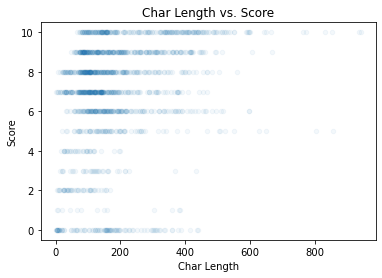

In [14]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [15]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.0750142588037207
test score = 0.013233546425281517


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.24857142857142858
test accuracy = 0.22


## 4. Feature Engineering
Create at least 3 different features

In [ ]:
identifier les morts pertinents question et comparer avec la réponse.pourcentage 
Indices de réponse beacuase(beacause,etc)
compteur pour la diversité des mots 
ponctuation, majuscule
taille moyenne, si trop court,
Grade level par rapport à son âge/créer des catégories 

In [18]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

#cette fonction permet d'enlever les stop_words d'une phrase

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [19]:
from nltk.tokenize import word_tokenize

#cette fonction permet d'enlever les stop_words et les majuscules des colonnes answer et question_text

def text_no_stopwords():
    compteur=[]
    df["answer_no_stopwords"]= [remove_stopwords(answer) for answer in df.answer]
    df["question_text_no_stopwords"]=[remove_stopwords(question) for question in df.question_text]
    
    
    df["answer_no_stopwords"] = [answer.lower() for answer in df.answer_no_stopwords]
    df["question_text_no_stopwords"] = [question.lower() for question in df.question_text_no_stopwords]
    
    
    
    df["answer_no_stopwords"] = [word_tokenize(answer) for answer in df.answer_no_stopwords]
    df["question_text_no_stopwords"] = [word_tokenize(question) for question in df.question_text_no_stopwords]
    
    
    return df



In [20]:
text_no_stopwords()
df.head()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso..."
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ..."
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w..."
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an..."
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]"


In [21]:
#cette fonction permet de trouver le nombre de matches entre les mots des réponses et des questions
def degree_of_match():
    compteur=[0]*df.shape[0]
    for i in range (df.shape[0]):
        for l in range(len(df['answer_no_stopwords'][i])):
            for m in range(len(df['question_text_no_stopwords'][i])):
                if(df['answer_no_stopwords'][i][l]==df['question_text_no_stopwords'][i][m]):
                    compteur[i]=compteur[i]+1 
    df["matches"]=compteur
                   
                
             
    return compteur

In [22]:
degree_of_match()
df.head()


            
       

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso...",1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an...",5
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]",0


In [23]:
from nltk.tokenize import sent_tokenize

#cette fonction permet de calculer le nombre de phrases dans une question

def number_of_sentence():
    sents=[]
    length=[]
    for i in range(df.shape[0]):
        sents.append(sent_tokenize(df["answer"][i]))
        length.append(len(sents[i]))
    df["number_of_sentence"]=length
    
    return length

In [24]:
x=number_of_sentence()
df.head()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso...",1,1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6,2
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6,1
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an...",5,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]",0,1


In [25]:
#cette fonction calcule le nombre de mots qui se répètent dans une réponse
def doublons():
    compteur=[0]*df.shape[0]
    for i in range (df.shape[0]):         
        compteur[i]= len(df["answer_no_stopwords"][i]) - len(set(df["answer_no_stopwords"][i]))     
    df["duplicates"]=compteur       
             
    return compteur

In [26]:
doublons()
df.head()




,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso...",1,1,2
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6,2,2
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6,1,0
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an...",5,1,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]",0,1,0


In [27]:
from spellchecker import SpellChecker
from collections import Counter
from nltk import pos_tag
from nltk.tokenize import word_tokenize
#cette fonction permet de compter le nombre de fautes d'orthographe par réponse
def spelling():
    misspelled=[]
    count=[]
    spell = SpellChecker()
    df['word_tokenize']=[word_tokenize(answer) for answer in df.answer]
    for i in range (df.shape[0]):
         misspelled.append(spell.unknown(df['word_tokenize'][i]))
         count.append(len(misspelled[i]))
    df["bad_spelling"]=count
    
    return count


In [28]:
spelling()
df.head()


,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates,word_tokenize,bad_spelling
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso...",1,1,2,"[Destiny, would, be, a, good, friend, beacu, l...",1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6,2,2,"[I, think, Mr.Popper, would, disagree, because...",1
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6,1,0,"[i, think, that, it, has, made, me, a, better,...",0
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an...",5,1,1,"[A, part, that, I, could, not, stop, reading, ...",1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]",0,1,0,"[its, not, as, good, as, the, any, of, the, ot...",0


In [29]:
#cette fonction reprend la fonction en partie 3 en utilisant les phrases sans stop_words
def lengthV2():
    df['length_no_stopwords']=[len(answer) for answer in df.answer_no_stopwords]
    return df


In [30]:
lengthV2()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates,word_tokenize,bad_spelling,length_no_stopwords
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friends, main, character, perso...",1,1,2,"[Destiny, would, be, a, good, friend, beacu, l...",1,10
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6,2,2,"[I, think, Mr.Popper, would, disagree, because...",1,20
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6,1,0,"[i, think, that, it, has, made, me, a, better,...",0,12
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, us, one, part, book, totally, bored, an...",5,1,1,"[A, part, that, I, could, not, stop, reading, ...",1,11
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, ones]","[book, remind, last, book, read, ?, ?]",0,1,0,"[its, not, as, good, as, the, any, of, the, ot...",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,373,"[could, intervine, point, story, would, toward...","[could, intervene, help, one, character, perso...",14,3,8,"[If, I, could, intervine, at, a, point, in, th...",3,39
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,109,"[picked, page, fell, ground, told, gave, looks...","[pick, picture, book, ., picture, tell, ?]",0,1,1,"[I, picked, the, page, that, he, fell, to, the...",0,9
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,66,"[part, says, part, says, two, pages, growing]","[describe, part, text, believe, belong, explai...",2,1,2,"[The, Part, Where, It, Says, The, Part, Where,...",0,7
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,107,"[would, rather, live, world, earth, planet, fo...","[would, rather, live, world, described, text, ...",6,1,2,"[I, would, rather, live, in, the, world, becau...",0,12


## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

Text(0.5, 1.0, 'Matches vs. Score')

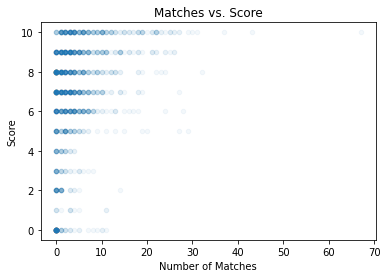

In [31]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'matches', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Score')
ax.set_title('Matches vs. Score')

Text(0.5, 1.0, 'Sentences vs. Score')

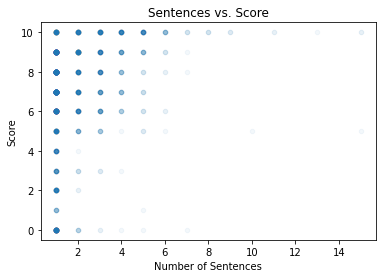

In [32]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'number_of_sentence', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of Sentences')
ax.set_ylabel('Score')
ax.set_title('Sentences vs. Score')

Text(0.5, 1.0, 'Duplications vs. Score')

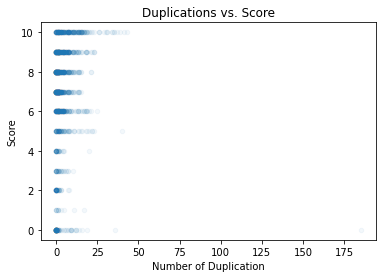

In [33]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'duplicates', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of Duplication')
ax.set_ylabel('Score')
ax.set_title('Duplications vs. Score')

Text(0.5, 1.0, 'Speelling vs. Score')

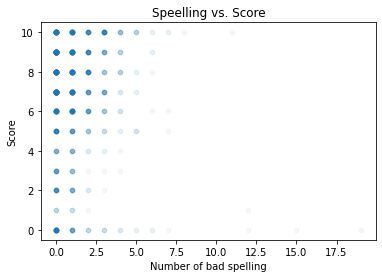

In [34]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'bad_spelling', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of bad spelling')
ax.set_ylabel('Score')
ax.set_title('Speelling vs. Score')

Text(0.5, 1.0, 'Length no stop_words vs. Score')

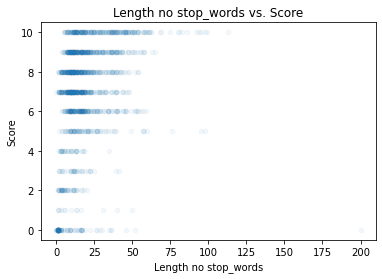

In [35]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length_no_stopwords', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Length no stop_words')
ax.set_ylabel('Score')
ax.set_title('Length no stop_words vs. Score')

## 6. Model Training
Pick a model, fit your features and print performance metrics

In [36]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(df[['matches','duplicates','number_of_sentence','bad_spelling','length_no_stopwords','duplicates']], df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 6) (1050,)
test shape (450, 6) (450,)


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.21722969534202974
test score = 0.1382990023145998


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.31523809523809526
test accuracy = 0.2644444444444444


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

In [39]:
## CODE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)
print (metrics.confusion_matrix(y_test, y_pred))

[[21  0  0  0  0  0  0  5  0  1  0]
 [ 1  0  0  0  0  0  0  1  0  0  0]
 [ 6  0  0  0  0  0  0  5  0  1  0]
 [ 0  0  0  0  0  0  1  4  0  2  2]
 [ 1  0  0  0  0  0  0  6  1  0  0]
 [ 1  0  0  0  0  1  4  8  0  7  4]
 [ 3  0  0  0  0  1  0 29  0 13  4]
 [ 5  0  0  0  0  0  1 39  1 18  9]
 [13  0  0  0  0  0  2 46  2 19 12]
 [ 1  0  0  0  0  0  5 31  0 19 22]
 [ 1  0  0  0  0  0  0 19  2 13 37]]


In [57]:
precision_score= metrics.precision_score(y_test, y_pred, pos_label=1, average='weighted')
recall_score=metrics.recall_score(y_test, y_pred, pos_label=1, average="weighted")

print('precision= ', precision_score.mean())
print('recall =', recall_score.mean())

precision=  0.25515161277474624
recall = 0.2644444444444444


In [ ]:
-parler de l'amélioration de matches 
-problèmes pour duplicates 
-problèmes pour spelling

-La fonction degree_of_matches() permet de compter le nombre de match entre les mots des colonnes answer_no_stopwords et question_text_no_stopwords.
Pour améliorer cette fonction il serait utile d appliquer une fonction qui modifierait les mots (nom commun, verbe, adjectif) issue d une même racine en une base sémentique.
Exemple : playing -> play
    
-La méthode duplicates() permet de compter le nombre d occurence d un mot dans une réponse.
Le résultat obtenu n était pas celui escompter. La tendance est que plus un nombre est répété dans une réponse plus le score est élvé. 

Nous obtenons une précision basse ...
Nous obtenons un recall bas ...


## 8. Second interation improvement


In [41]:
#première amélioration des colonnes answer_no_stopwords/question_text_no_stopwords 
def lemmatization():
    wnl = WordNetLemmatizer() 
    for i in range(df.shape[0]):
        for l in range(len(df['answer_no_stopwords'][i])):
            df['answer_no_stopwords'][i][l]=wnl.lemmatize(df['answer_no_stopwords'][i][l])
        for m in range(len(df['question_text_no_stopwords'][i])):
            df['question_text_no_stopwords'][i][m]=wnl.lemmatize(df['question_text_no_stopwords'][i][m])
    return df

In [42]:
lemmatization()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates,word_tokenize,bad_spelling,length_no_stopwords
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, like, re...","[would, enjoy, friend, main, character, person...",1,1,2,"[Destiny, would, be, a, good, friend, beacu, l...",1,10
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagree, absent, mi...","[character, think, would, disagree, narrator, ...",6,2,2,"[I, think, Mr.Popper, would, disagree, because...",1,20
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, made, better, person, starting, make, ...","[think, reading, text, made, better, person, w...",6,1,0,"[i, think, that, it, has, made, me, a, better,...",0,12
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, reading, cave.a, part, bor...","[tell, u, one, part, book, totally, bored, ano...",5,1,1,"[A, part, that, I, could, not, stop, reading, ...",1,11
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, one]","[book, remind, last, book, read, ?, ?]",0,1,0,"[its, not, as, good, as, the, any, of, the, ot...",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,373,"[could, intervine, point, story, would, toward...","[could, intervene, help, one, character, perso...",14,3,8,"[If, I, could, intervine, at, a, point, in, th...",3,39
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,109,"[picked, page, fell, ground, told, gave, look,...","[pick, picture, book, ., picture, tell, ?]",0,1,1,"[I, picked, the, page, that, he, fell, to, the...",0,9
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,66,"[part, say, part, say, two, page, growing]","[describe, part, text, believe, belong, explai...",2,1,2,"[The, Part, Where, It, Says, The, Part, Where,...",0,7
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,107,"[would, rather, live, world, earth, planet, fo...","[would, rather, live, world, described, text, ...",6,1,2,"[I, would, rather, live, in, the, world, becau...",0,12


In [43]:
#deuxième modification des deux colonnes en utilisation Stemmer 
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
def stemmer():
    for i in range(df.shape[0]):
        for l in range(len(df['answer_no_stopwords'][i])):
            df['answer_no_stopwords'][i][l]=st.stem(df['answer_no_stopwords'][i][l])
        for m in range(len(df['question_text_no_stopwords'][i])):
            df['question_text_no_stopwords'][i][m]=st.stem(df['question_text_no_stopwords'][i][m])
    return df

In [44]:
stemmer()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates,word_tokenize,bad_spelling,length_no_stopwords
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, lik, rea...","[would, enjoy, friend, main, charact, person, ...",1,1,2,"[Destiny, would, be, a, good, friend, beacu, l...",1,10
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagr, abs, mind, m...","[charact, think, would, disagr, nar, story, ?,...",6,2,2,"[I, think, Mr.Popper, would, disagree, because...",1,20
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, mad, bet, person, start, mak, read, of...","[think, read, text, mad, bet, person, wors, pe...",6,1,0,"[i, think, that, it, has, made, me, a, better,...",0,12
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, read, cave.a, part, bor, g...","[tel, u, on, part, book, tot, bor, anoth, on, ...",5,1,1,"[A, part, that, I, could, not, stop, reading, ...",1,11
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, on]","[book, remind, last, book, read, ?, ?]",0,1,0,"[its, not, as, good, as, the, any, of, the, ot...",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,373,"[could, intervin, point, story, would, toward,...","[could, interv, help, on, charact, person, on,...",14,3,8,"[If, I, could, intervine, at, a, point, in, th...",3,39
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,109,"[pick, pag, fel, ground, told, gav, look, lik,...","[pick, pict, book, ., pict, tel, ?]",0,1,1,"[I, picked, the, page, that, he, fell, to, the...",0,9
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,66,"[part, say, part, say, two, pag, grow]","[describ, part, text, believ, belong, explain,...",2,1,2,"[The, Part, Where, It, Says, The, Part, Where,...",0,7
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,107,"[would, rath, liv, world, ear, planet, food, w...","[would, rath, liv, world, describ, text, read,...",6,1,2,"[I, would, rather, live, in, the, world, becau...",0,12


In [45]:
#une fois la fonction stemmer() appelé on appelle à nouveau la fonction suivante
degree_of_match()
doublons()
lengthV2()

,answer,question_text,text_id,grade,score,length,answer_no_stopwords,question_text_no_stopwords,matches,number_of_sentence,duplicates,word_tokenize,bad_spelling,length_no_stopwords
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,"[destiny, would, good, friend, beacu, lik, rea...","[would, enjoy, friend, main, charact, person, ...",2,1,2,"[Destiny, would, be, a, good, friend, beacu, l...",1,10
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,"[think, mr.popper, would, disagr, abs, mind, m...","[charact, think, would, disagr, nar, story, ?,...",6,2,2,"[I, think, Mr.Popper, would, disagree, because...",1,20
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,"[think, mad, bet, person, start, mak, read, of...","[think, read, text, mad, bet, person, wors, pe...",7,1,1,"[i, think, that, it, has, made, me, a, better,...",0,12
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,"[part, could, stop, read, cave.a, part, bor, g...","[tel, u, on, part, book, tot, bor, anoth, on, ...",6,1,1,"[A, part, that, I, could, not, stop, reading, ...",1,11
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,"[good, on]","[book, remind, last, book, read, ?, ?]",0,1,0,"[its, not, as, good, as, the, any, of, the, ot...",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,373,"[could, intervin, point, story, would, toward,...","[could, interv, help, on, charact, person, on,...",14,3,9,"[If, I, could, intervine, at, a, point, in, th...",3,39
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,109,"[pick, pag, fel, ground, told, gav, look, lik,...","[pick, pict, book, ., pict, tel, ?]",1,1,1,"[I, picked, the, page, that, he, fell, to, the...",0,9
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,66,"[part, say, part, say, two, pag, grow]","[describ, part, text, believ, belong, explain,...",2,1,2,"[The, Part, Where, It, Says, The, Part, Where,...",0,7
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,107,"[would, rath, liv, world, ear, planet, food, w...","[would, rath, liv, world, describ, text, read,...",6,1,2,"[I, would, rather, live, in, the, world, becau...",0,12


Text(0.5, 1.0, 'Matches vs. Score')

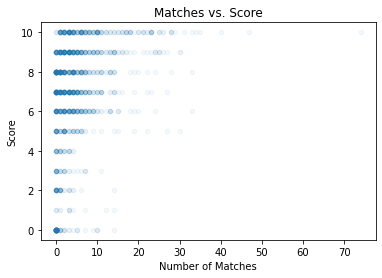

In [46]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'matches', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Score')
ax.set_title('Matches vs. Score')

Text(0.5, 1.0, 'Duplications vs. Score')

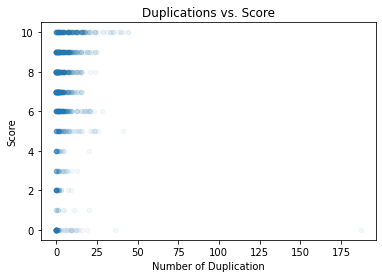

In [47]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'duplicates', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number of Duplication')
ax.set_ylabel('Score')
ax.set_title('Duplications vs. Score')

Text(0.5, 1.0, 'Length no stop_words vs. Score')

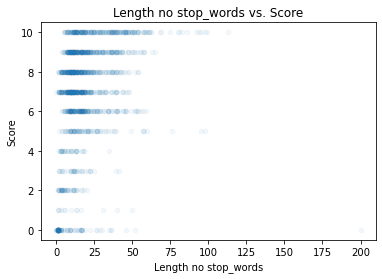

In [48]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length_no_stopwords', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Length no stop_words')
ax.set_ylabel('Score')
ax.set_title('Length no stop_words vs. Score')

In [49]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(df[['matches','number_of_sentence','bad_spelling','length_no_stopwords','duplicates']], df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 5) (1050,)
test shape (450, 5) (450,)


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.21758927987724153
test score = 0.14187952167585316


In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.3171428571428571
test accuracy = 0.26666666666666666


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)
print (metrics.confusion_matrix(y_test, y_pred))

[[23  0  0  0  0  0  0  4  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0]
 [ 7  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  1  4  0  2  2]
 [ 0  0  0  0  0  0  0  7  1  0  0]
 [ 1  0  0  0  0  1  4  8  1  3  7]
 [ 2  0  0  0  0  1  2 27  1 12  5]
 [ 7  0  0  0  0  0  1 38  2 14 11]
 [15  0  0  0  0  0  4 47  3 12 13]
 [ 1  0  0  0  0  0  7 33  1 14 22]
 [ 1  0  0  0  0  0  1 19  3  9 39]]


In [59]:
precision_score= metrics.precision_score(y_test, y_pred, pos_label=1, average='weighted')
recall_score=metrics.recall_score(y_test, y_pred, pos_label=1, average="weighted")

print('precision= ', precision_score.mean())
print('recall =', recall_score.mean())

precision=  0.24664232101251934
recall = 0.26666666666666666


In [ ]:
augemente légèrement le recall ... 
baisse légèrement la précision ... 